# eazy-gnuplot 'gnuplot Cookbook' Companion

This document is a companion for [eazy-gnuplot](https://github.com/guicho271828/eazy-gnuplot)  users going through the 'excellent book by Lee Philips ['gnuplot Cookbook'](https://www.packtpub.com/big-data-and-business-intelligence/gnuplot-cookbook) from Packt Publishing. I highly recommend buying this book. 

In this companion we demonstrate implementing the plots in the book using `eazy-gnuplot`. Liberties have been taken plots may not follow exactly what is shown in the book (when they don't they follow the spirit).

This document is an iPython notebook from [common-lisp-jupyter](https://github.com/yitzchak/common-lisp-jupyter). Clone eazy-gnuplot or download this notebook at https://github.com/guicho271828/eazy-gnuplot/blob/master/docs/eazy-gnuplot-cookbook-companion.ipynb. Go to the downloaded directory and execute 'jupyter notebook' from a shell.

Edit: Updated the notebook for newer eazy-gnuplot and common-lisp-jupyter (a successor of cl-jupyter that is better maintained). I strongly recommend installation via Roswell (without it, installation is kind of manual). (Masataro Asai)

In [1]:
;png-from-file is used to display png files in cl-jupyter if not using cl-jupyter create a dummy function
(defun png-from-file (f) (jupyter:file f :display t))

PNG-FROM-FILE

In [2]:
;We need a directory called images to store our plots make sure it exists
(ensure-directories-exist "images/")

"images/"

NIL

In [3]:
(quicklisp-client:quickload '(:eazy-gnuplot :clml.statistics :clml.utility))
(use-package :eazy-gnuplot)

To load "eazy-gnuplot":
  Load 1 ASDF system:
    eazy-gnuplot
; Loading "eazy-gnuplot"
[package lisp-namespace-asd]
To load "clml.statistics":
  Load 1 ASDF system:
    clml.statistics
; Loading "clml.statistics"
[package clml.statistics.rand-environment]
To load "clml.utility":
  Load 1 ASDF system:
    clml.utility
; Loading "clml.utility"
[package drakma-asd]..............................
[package flexi-streams-system]....................
[package chipz-system]...

(:EAZY-GNUPLOT :CLML.STATISTICS :CLML.UTILITY)

T

# 1 Plotting Curves Boxes Points and More



FUNCTION-PLOT

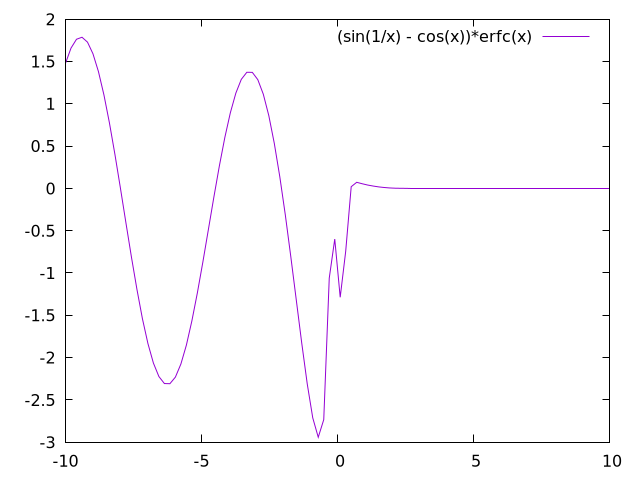

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [4]:
(defun function-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot "(sin(1/x) - cos(x))*erfc(x)"))
  output)
(png-from-file (function-plot "images/function-plot.png"))
                              


SEPERATE-Y-AXIS-PLOT

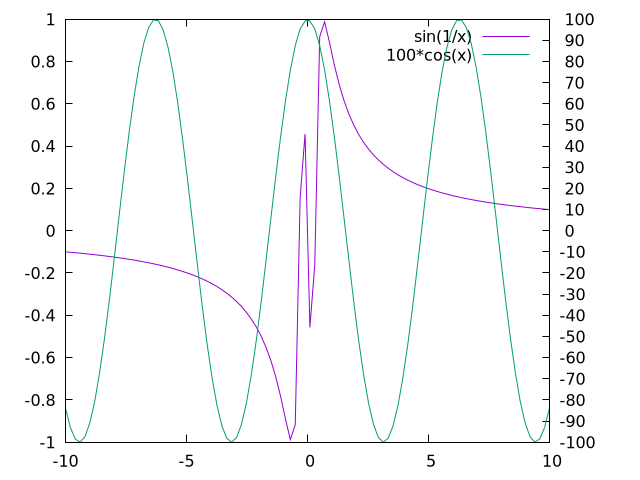

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [5]:
(defun seperate-y-axis-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :y2tics '(-100 10) :ytics
              :nomirror)
    (plot "sin(1/x) axis x1y1,100*cos(x) axis x1y2"))
  output)
(png-from-file (seperate-y-axis-plot "images/seperate-y-axis-plot.png"))


SEPERATE-Y-AXIS2-PLOT

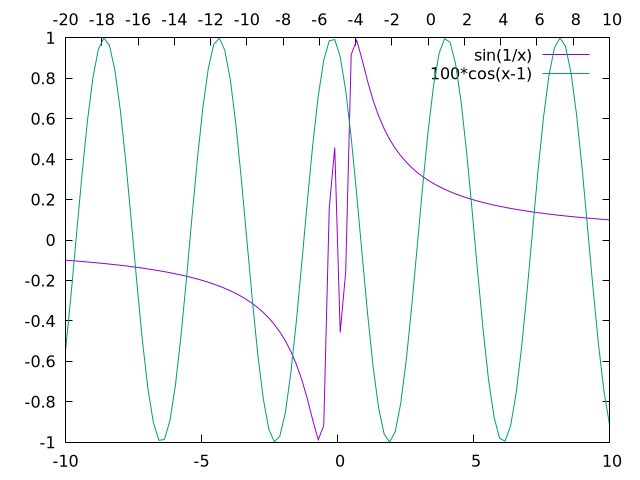

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [6]:
(defun seperate-y-axis2-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :x2tics '(-20 2) :xtics
              :nomirror :xrange '(-10 10) :x2range '(-20 10) :samples
              100)
    (plot "sin(1/x) axis x1y1")
    (plot "100*cos(x-1) axis x2y2"))
  output)
(png-from-file (seperate-y-axis2-plot "images/seperate-y-axis2-plot.png"))


SCATTER-PLOT

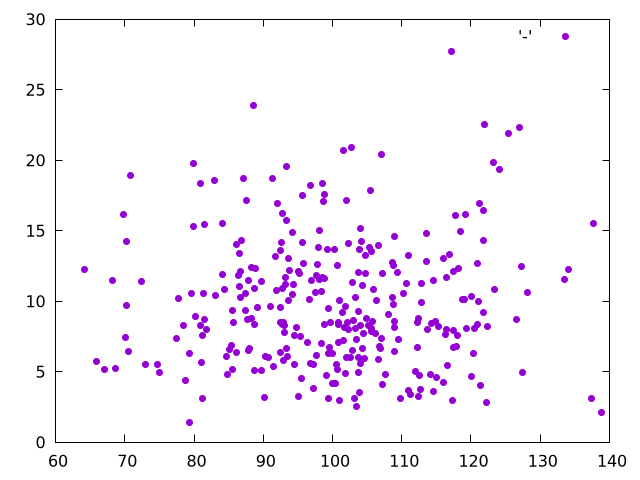

In [7]:
(defun scatter-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for p in (map 'list (lambda (x y) (list x y))
                           (clml.statistics:rand-n
                            (clml.statistics:chi-square-distribution 100) 300)
                           (clml.statistics:rand-n
                            (clml.statistics:chi-square-distribution 10) 300))
             do (format s "~&~{~a~^ ~}" p)))
     :with '(:points :pt 7)))
  output)
(png-from-file (scatter-plot "images/scatter-plot.png"))


PLOTTING-BOXES-PLOT

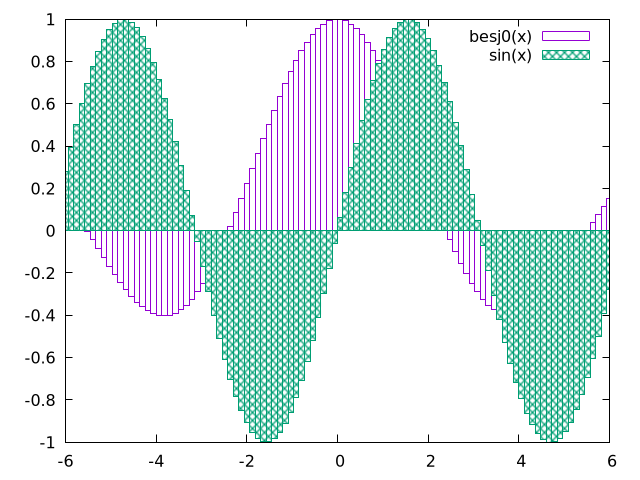

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [8]:
(defun plotting-boxes-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style '(:fill :pattern))
    (plot "[-6:6] besj0(x) with boxes, sin(x) with boxes"))
  output)
(png-from-file (plotting-boxes-plot "images/plotting-boxes-plot.png"))


PLOTTING-BOXES-SOLID-PLOT

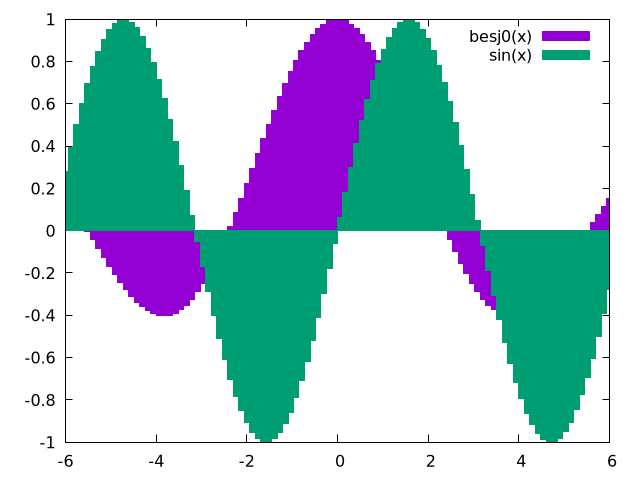

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [9]:
(defun plotting-boxes-solid-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style '(:fill :solid))
    (plot "[-6:6] besj0(x) with boxes, sin(x) with boxes"))
  output)
(png-from-file
 (plotting-boxes-solid-plot "images/plotting-boxes-solid-plot.png"))


PLOTTING-CIRCLES-PLOT

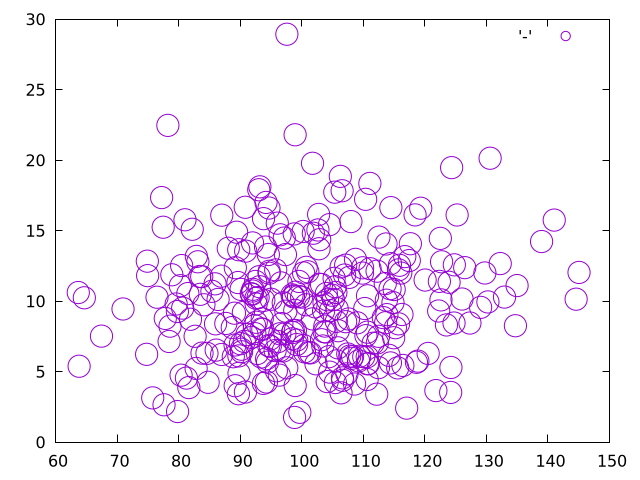

In [10]:
(defun plotting-circles-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for p in (map 'list (lambda (x y z) 
                                         (declare (ignorable z))
                                         (list x y))
                            (clml.statistics:rand-n
                              (clml.statistics:chi-square-distribution 100) 300)
                            (clml.statistics:rand-n
                              (clml.statistics:chi-square-distribution 10) 300)
                            (clml.statistics:rand-n
                              (clml.statistics:chi-square-distribution 1) 300))
             do (format s "~&~{~a~^ ~}" p)))
     :with '(:circles)))
  output)
(png-from-file (plotting-circles-plot "images/plotting-circles-plot.png"))


DRAWING-FILLED-CURVES-PLOT

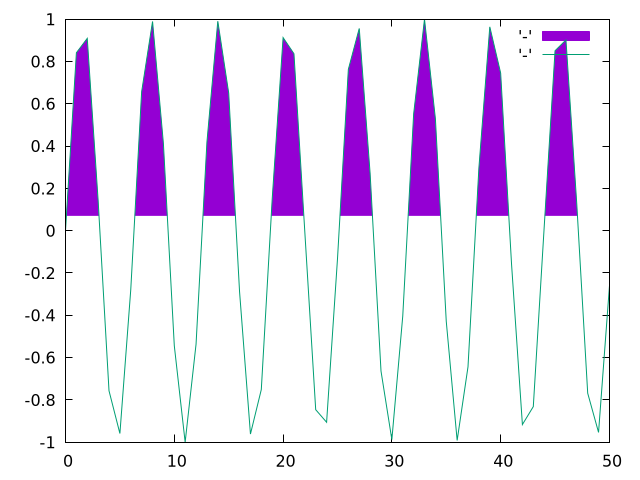

In [11]:
(defun drawing-filled-curves-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :isosamples 1000)
    (plot
     (lambda ()
       (loop for i from 0 upto 50
             do (format s "~&~a ~a" i (sin i))))
     :with '(:filledcurves :above :y1 = 0.07))
    (plot
     (lambda ()
       (loop for i from 0 upto 50
             do (format s "~&~a ~a" i (sin i))))
     :with '(:lines)))
  output)
(png-from-file
 (drawing-filled-curves-plot "images/drawing-filled-curves-plot.png"))


DRAWING-BLUE-FILLED-CURVES

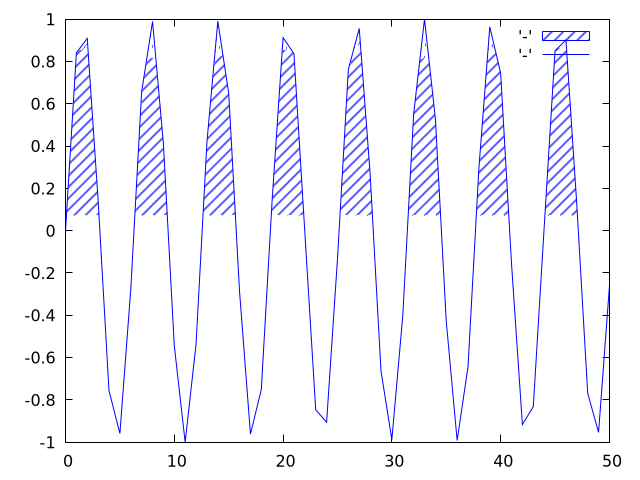

In [12]:
(defun drawing-blue-filled-curves (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style '(fill pattern 5))
    (plot
     (lambda ()
       (loop for i from 0 upto 50
             do (format s "~&~a ~a" i (sin i))))
     :lt '(rgb "blue") :with '(:filledcurves :above :y1 = 0.07))
      (plot
     (lambda ()
       (loop for i from 0 upto 50
             do (format s "~&~a ~a" i (sin i))))
     :lt '(rgb "blue") :with '(:lines)))
  output)
(png-from-file
 (drawing-blue-filled-curves "images/drawing-blue-filled-curves.png"))


This exercise requires Gnuplot 5



FILLED-CURVES-PLOT

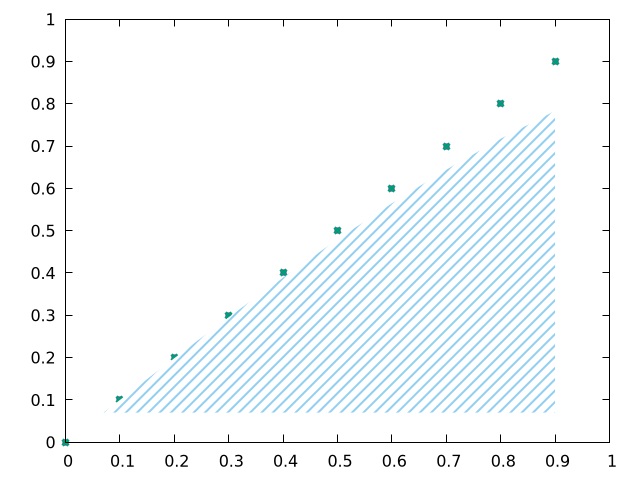

In [13]:
(defun filled-curves-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(:pngcairo) :output output :style
              '(fill pattern 5))
    (plot
     (lambda ()
       (loop for i from 0 upto 1 by 0.1
             do (format s "~&~a ~a ~a" i i (sin i))))
     :using '(1 2 3) :lw 3 :notitle ())
    (plot
     (lambda ()
       (loop for i from 0 upto 1 by 0.1
             do (format s "~&~a ~a ~a" i i (sin i))))
     :using '(1 2) :lw 3 :notitle ())
    (plot
     (lambda ()
       (loop for i from 0 upto 1 by 0.1
             do (format s "~&~a ~a ~a" i i (sin i))))
     :using '(1 3) :lw 3 :notitle () :with '(:filledcurves :above :y1 = 0.07)))
  output)
(png-from-file (filled-curves-plot "images/filled-curves-plot.png"))


In [14]:
;; does not work now; this google service is 404.
(defun finance-bars-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (s :debug nil)
      (gp-setup :terminal '(pngcairo) :output output :bars 2)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 100)
               do (format s "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(0 2 3 4 5) :with 'financebars)))
  output)
;; (png-from-file (finance-bars-plot "images/finance-bars-plot.png"))


FINANCE-BARS-PLOT

HISTOGRAM-LIKE-PLOT

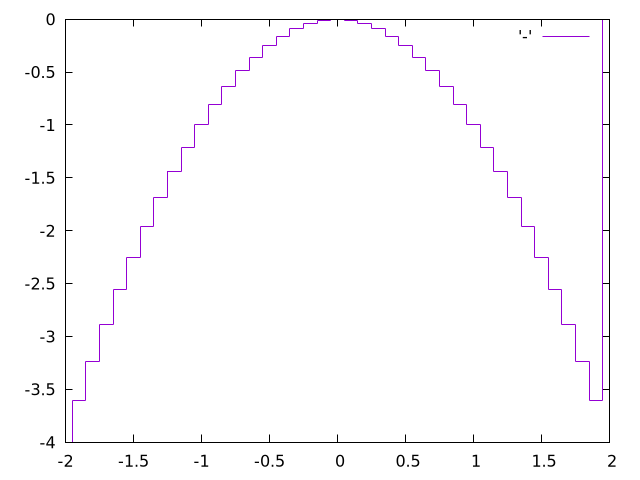

In [15]:
(defun histogram-like-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (plot
     (lambda ()
       (loop for i from -2 upto 2 by 0.1
             do (format s "~&~a ~a" i (- (* i i)))))
     :with '(:histeps)))
  output)
(png-from-file (histogram-like-plot "images/histogram-like-plot.png"))


HISTOGRAM-STACKED-PLOT

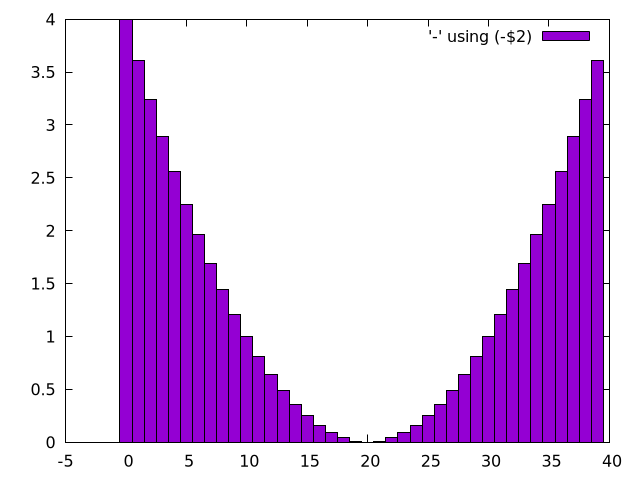

In [16]:
(defun histogram-stacked-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output :style
              '(fill solid 1.0 border lt -1) :style '(data histograms) :style
              '(histogram rowstacked))
    (plot
     (lambda ()
       (loop for i from -2 upto 2 by 0.1
             do (format s "~&~a ~a ~a ~a" i (- (* i i)) (* i i) i)))
     :using (list "(-$2)") :using (list "(20*$2)") :notitle nil))
  output)
(png-from-file (histogram-stacked-plot "images/histogram-stacked-plot.png"))


MULTIPLE-HISTOGRAMS-PLOT

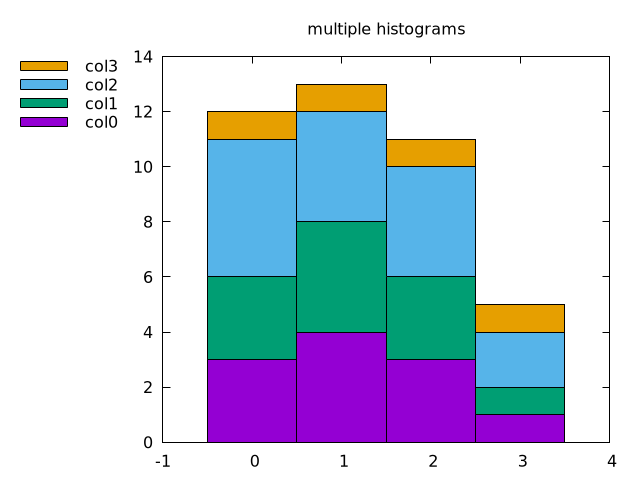

In [17]:
(defun multiple-histograms-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "multiple histograms" :key '(invert reverse left outside) :key
              '(autotitle columnheader) :style '(data histogram) :style
              '(histogram rowstacked) :style '(fill solid border -1))
    (flet ((data ()
           (loop for r in '((8.01 1 5 1) (8.02 3 5 1) (8.03 4 4 1) (8.04 3 4 1)
                            (8.05 1 2 1))
                 do (format s "~&~{~^~a ~}" r))))
        (plot #'data :using 2 :title "col0")
        (plot #'data :using 2 :title "col1")
        (plot #'data :using 3 :title "col2")
        (plot #'data :using 4 :title "col3")))
  output)
(png-from-file
 (multiple-histograms-plot "images/multiple-histograms-plot.png"))


ERROR-BARS-PLOT

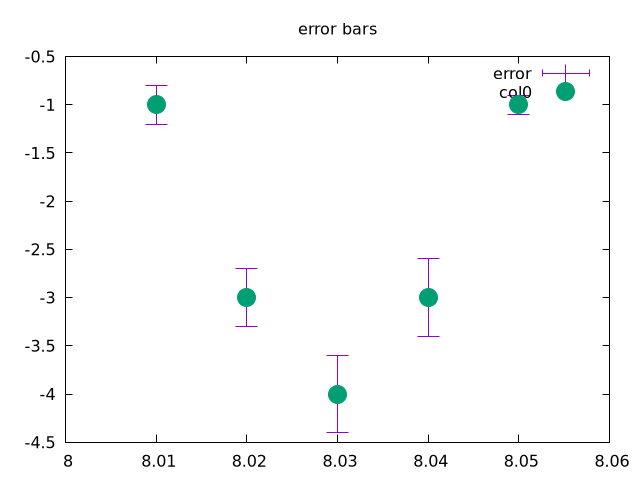

In [18]:
(defun error-bars-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "error bars" :bars 3
              :pointsize 3 :xrange '(8.0 8.06))
    (flet ((data ()
           (loop for r in '((8.01 1 0.2) (8.02 3 0.3) (8.03 4 0.4) (8.04 3 0.4) (8.05 1 0.1))
                 do (format s "~&~{~^~a ~}" r))))
        (plot #'data :using '(1 |(-$2)| 3) :title "error" :with :errorbars)
        (plot #'data :using '(1 |(-$2)| 3) :title "col0" :pt 7)))
  output)
(png-from-file (error-bars-plot "images/error-bars-plot.png"))


BOXERROR-BARS-PLOT

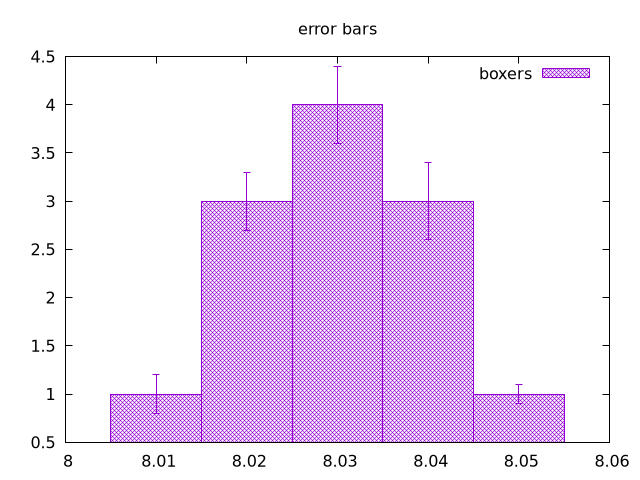

In [19]:
(defun boxerror-bars-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "error bars" :style
              '(fill pattern 2 border) :xrange '(8.0 8.06))
    (plot
     (lambda ()
       (loop for r in '((8.01 1 0.2) (8.02 3 0.3) (8.03 4 0.4) (8.04 3 0.4)
                        (8.05 1 0.1))
             do (format s "~&~{~^~a ~}" r)))
     :using '(1 |($2)| 3) :with :boxerrorbars :title "boxers"))
  output)
(png-from-file (boxerror-bars-plot "images/boxerror-bars-plot.png"))


CANDLESTICK-PLOT

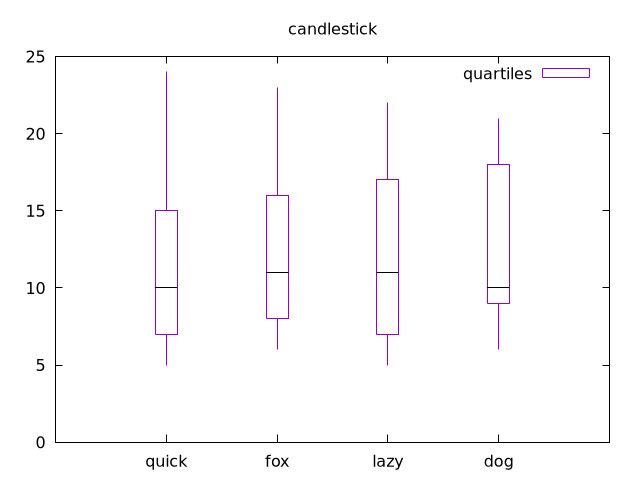

In [20]:
(defun candlestick-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange '(0 5) :yrange '(0 25) :boxwidth '(0.2 absolute))
    (flet ((data ()
             (loop for r in '((1 5 7 10 15 24 0.3 "quick")
                              (2 6 8 11 16 23 0.4 "fox")
                              (3 5 7 11 17 22 0.5 "lazy")
                              (4 6 9 10 18 21 0.3 "dog"))
                 do (format s "~&~{~^~a ~}" r))))
        (plot #'data :using '(1 3 2 6 5 |xticlabels(8)|) :with :candlesticks :title "quartiles")
        (plot #'data :using '(1 4 4 4 4) :with :candlesticks :lt -1 :notitle ())))
  output)
(png-from-file (candlestick-plot "images/candlestick-plot.png"))


IMPLUSE-PLOT

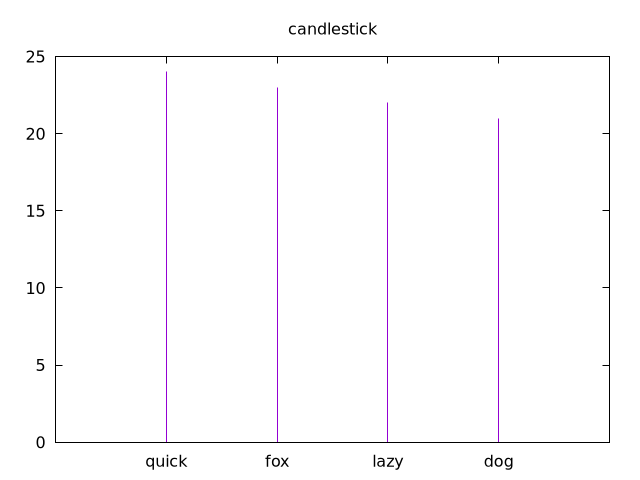

In [21]:
(defun impluse-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange '(0 5))
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "quick")
                        (2 6 8 11 16 23 0.4 "fox")
                        (3 5 7 11 17 22 0.5 "lazy")
                        (4 6 9 10 18 21 0.3 "dog"))
             do (format s "~&~{~^~a ~}" r)))
     :using '(1 6 |xticlabels(8)|) :with :impulses :notitle ()))
  output)
(png-from-file (impluse-plot "images/impluse-plot.png"))


STEM-PLOT

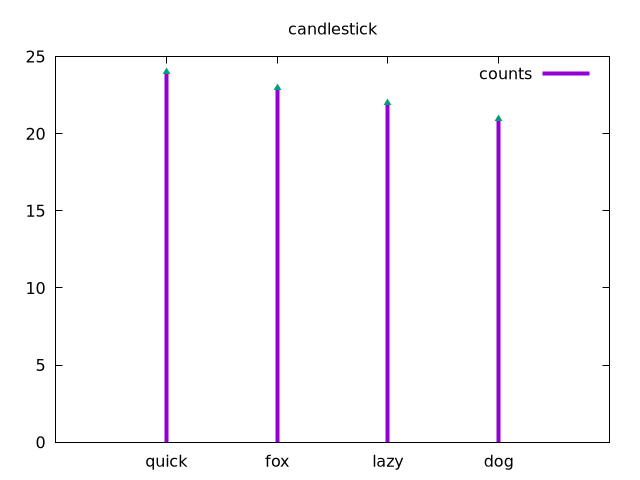

In [22]:
(defun stem-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange '(0 5) :yrange '(0 25))
    (flet ((data ()
             (loop for r in '((1 5 7 10 15 24 0.3 "quick")
                              (2 6 8 11 16 23 0.4 "fox")
                              (3 5 7 11 17 22 0.5 "lazy")
                              (4 6 9 10 18 21 0.3 "dog"))
                 do (format s "~&~{~^~a ~}" r))))
    (plot #'data
     :using '(1 6 |xticlabels(8)|) :with :impulses :lw 4 :title "counts")
    (plot #'data
     :using '(1 6) :with :points :pt 9 :notitle ())))
  output)
(png-from-file (stem-plot "images/stem-plot.png"))


PARAMETRIC-PLOT

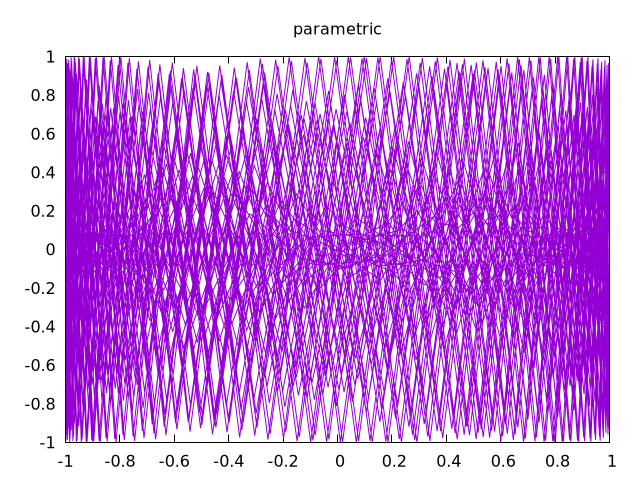

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [23]:
(defun parametric-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "parametric"
              :samples 1000 :parametric 'nil :trange '(-7 20))
    (plot "sin(7*t), sin(111*t)" :notitle 'nil))
  output)
(png-from-file (parametric-plot "images/parametric-plot.png"))


PARAMETRIC2-PLOT

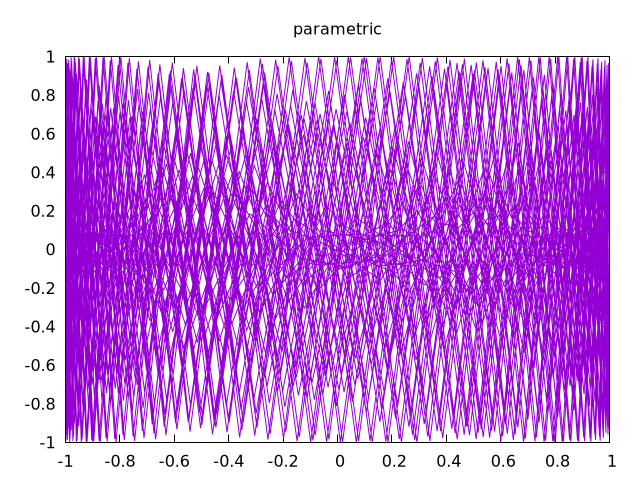

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [24]:
(defun parametric2-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "parametric"
              :samples 1000 :parametric 'nil :trange '(-7 20))
    (plot "sin(7*t), sin(111*t)" :notitle 'nil))
  output)
(png-from-file (parametric2-plot "images/parametric2-plot.png"))


POLAR-PLOT

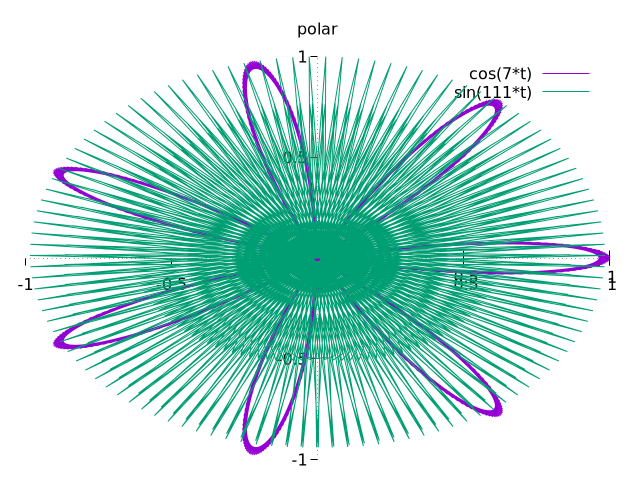

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [25]:
(defun polar-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "polar" :xtics
              :axis :xtics :nomirror :ytics :axis :ytics :nomirror :zeroaxis () :samples
              500 :polar () :trange '(0 |12*pi|))
    (gp :unset :border)
    (gp :unset :raxis)
    (plot "cos(7*t), sin(111*t)"))
  output)
(png-from-file (polar-plot "images/polar-plot.png"))


#2 Annotating With Labels and Legends



LABELING-THE-AXIS-PLOT

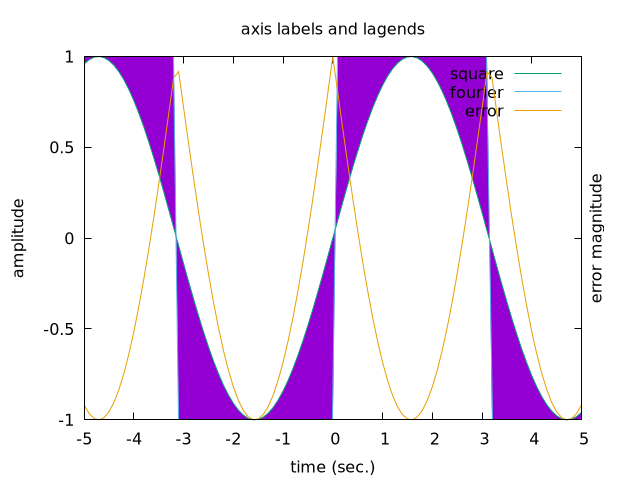

In [26]:
(defun labeling-the-axis-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude")
    (flet ((data ()
            (loop for x from -5 upto 5 by 0.1
                  do (format s "~&~a ~a ~a" x (sin x) (log x)))))
      (plot #'data :using '(1 2 |(sgn($2))|) :with :filledcurves :notitle ())
      (plot #'data :using '(1 2) :with :lines :title "square")
      (plot #'data :using '(1 |(sgn($2))|) :with :lines :title "fourier")
      (plot #'data :using '(1 |(abs(sgn($2)-$2))|) :with :lines :axis :x1y2 :title "error")))
  output)
(png-from-file (labeling-the-axis-plot "images/labeling-the-axis-plot.png"))


### This plot generates a postscript file
If you have a postscript viewer like *ghostscript* you open the file at the path given by the output of `setting-label-size-plot. Other wise we have included a conversion of it to a png below

In [27]:
(defun setting-label-size-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(postscript landscape "courier, 18") :output output
              :title "axis labels and lagends" :parametric 'nil :xlabel
              "time (sec.)" :ylabel "amplitude" :y2label "error magnitude")
    (flet ((data ()
            (loop for x from -5 upto 5 by 0.1
                  do (format s "~&~a ~a ~a" x (sin x) (log x)))))
      (plot #'data :using '(1 2 |(sgn($2))|) :with :filledcurves :notitle ())
      (plot #'data :using '(1 2) :with :lines :title "square")
      (plot #'data :using '(1 |(sgn($2))|) :with :lines :title "fourier")
      (plot #'data :using '(1 |(abs(sgn($2)-$2))|) :with :lines :axis :x1y2 :title "error")))
  output)
(png-from-file (setting-label-size-plot "images/setting-label-size-plot.ps"))


SETTING-LABEL-SIZE-PLOT

images/setting-label-size-plot.ps

<img src="images/setting-label-size-plot.png"/>


ADDING-A-LEGEND-PLOT

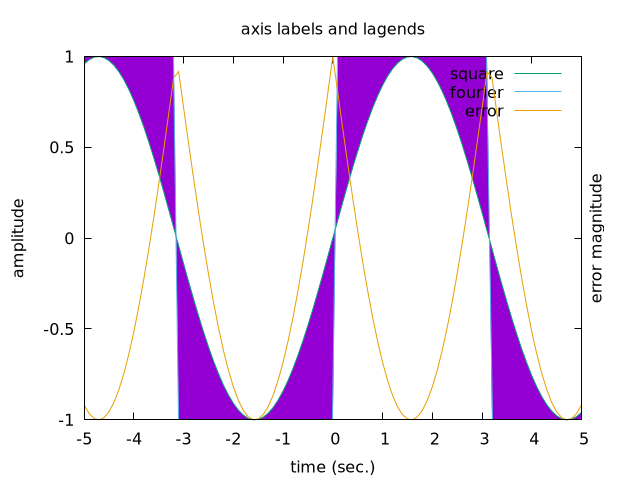

In [28]:
(defun adding-a-legend-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude")
    (flet ((data ()
            (loop for x from -5 upto 5 by 0.1
                  do (format s "~&~a ~a ~a" x (sin x) (log x)))))
      (plot #'data :using '(1 2 |(sgn($2))|) :with :filledcurves :notitle ())
      (plot #'data :using '(1 2) :with :lines :title "square")
      (plot #'data :using '(1 |(sgn($2))|) :with :lines :title "fourier")
      (plot #'data :using '(1 |(abs(sgn($2)-$2))|) :with :lines :axis :x1y2 :title "error")))
  output)
(png-from-file (adding-a-legend-plot "images/adding-a-legend-plot.png"))


PUTTING-A-BOX-AROUND-A-LEGEND-PLOT

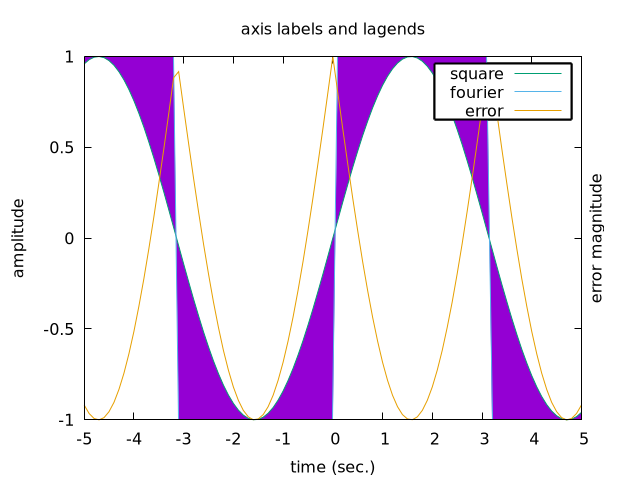

In [29]:
(defun putting-a-box-around-a-legend-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude" :key
              '(box lt -1 lw 2 opaque))
    (flet ((data ()
            (loop for x from -5 upto 5 by 0.1
                  do (format s "~&~a ~a ~a" x (sin x) (log x)))))
      (plot #'data :using '(1 2 |(sgn($2))|) :with :filledcurves :notitle ())
      (plot #'data :using '(1 2) :with :lines :title "square")
      (plot #'data :using '(1 |(sgn($2))|) :with :lines :title "fourier")
      (plot #'data :using '(1 |(abs(sgn($2)-$2))|) :with :lines :axis :x1y2 :title "error")))
  output)
(png-from-file
 (putting-a-box-around-a-legend-plot
  "images/putting-a-box-around-a-legend-plot.png"))


ADDING-A-LABEL-WITH-ARROW-PLOT

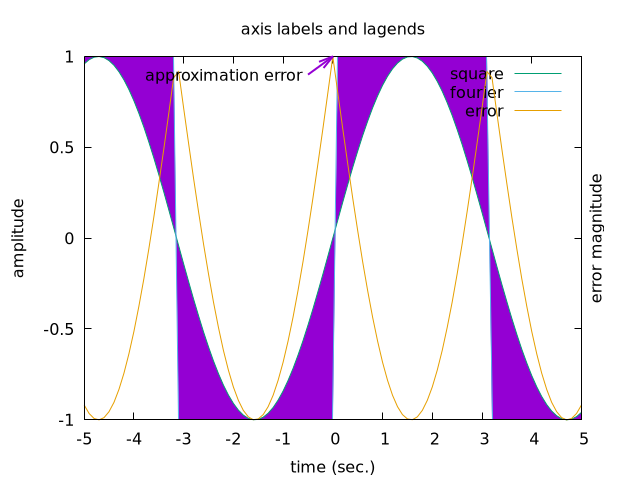


" set terminal pngcairo 
 set output \"images/adding-a-label-with-arrow-plot.png\" 
 set title \"axis labels and lagends\" 
 set parametric  
 set xlabel \"time (sec.)\" 
 set ylabel \"amplitude\" 
 set y2label \"error magnitude\" 
 set label \"approximation error\" right at -0.5,0.9 offset -0.5,0 front 
 set arrow from first -0.5 , 0.9 to 0 , 1 lt 1 lw 2 front size 0.3,15 
plot '-' using 1:2:(sgn($2)) with filledcurves notitle , '-' using 1:2 with lines title \"square\", '-' using 1:(sgn($2)) with lines title \"fourier\", '-' using 1:(abs(sgn($2)-$2)) with lines axis x1y2 title \"error\"
-5 0.9589243 #C(1.609438 3.1415927)
-4.9 0.9824526 #C(1.5892352 3.1415927)
-4.8 0.9961646 #C(1.5686159 3.1415927)
-4.7000003 0.9999233 #C(1.5475626 3.1415927)
-4.6000004 0.993691 #C(1.5260564 3.1415927)
-4.5000005 0.97753024 #C(1.5040776 3.1415927)
-4.4000006 0.9516022 #C(1.4816047 3.1415927)
-4.3000007 0.9161662 #C(1.4586152 3.1415927)
-4.200001 0.87157613 #C(1.4350847 3.1415927)
-4.100001 0.8182776

In [30]:
(defun adding-a-label-with-arrow-plot (output)
  (with-plots (s :debug t)
    (gp-setup :output output :terminal '(:pngcairo) :title
              "axis labels and lagends" :parametric 'nil :xlabel "time (sec.)"
              :ylabel "amplitude" :y2label "error magnitude")
    (gp :set :label "approximation error" :right :at '(-0.5 0.9) :offset '(-0.5 0) :front)
    (gp :set :arrow :from :first '|-0.5 , 0.9| :to '|0 , 1| :lt 1 :lw 2 :front :size '(0.3 15))
    (flet ((data ()
            (loop for x from -5 upto 5 by 0.1
                  do (format s "~&~a ~a ~a" x (sin x) (log x)))))
      (plot #'data :using '(1 2 |(sgn($2))|) :with :filledcurves :notitle ())
      (plot #'data :using '(1 2) :with :lines :title "square")
      (plot #'data :using '(1 |(sgn($2))|) :with :lines :title "fourier")
      (plot #'data :using '(1 |(abs(sgn($2)-$2))|) :with :lines :axis :x1y2 :title "error")))
  output)
(png-from-file
 (adding-a-label-with-arrow-plot "images/adding-a-label-with-arrow-plot.png"))


USING-UNICODE-CHARACTERS-PLOT

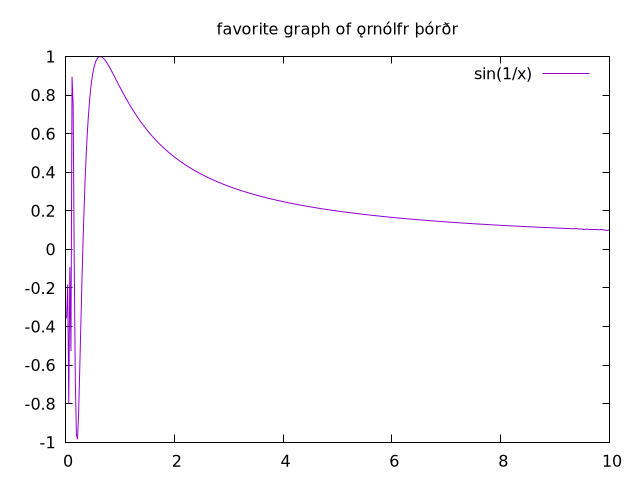

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [31]:
(defun using-unicode-characters-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :samples 500)
    (gp :set :encoding 'utf8)
    (gp :set :title "favorite graph of ǫrnólfr þórðr")
    'font
    "helvetica, 24"
    (plot "[0:10] sin(1/x)"))
  output)
(png-from-file
 (using-unicode-characters-plot "images/using-unicode-characters-plot.png"))


#3 Applying Colors and Styles



COLORING-CURVES-PLOT

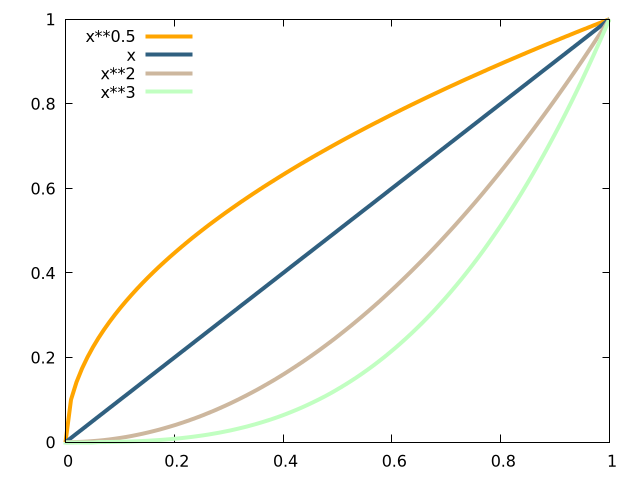

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [32]:
(defun coloring-curves-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo solid lw 4) :xrange '(0 1))
    (gp :set :border '(lw 0.25))
    (gp :set :key '(top left))
    (plot
     "x**0.5" :lc '(rgb "orange"))
    (plot
     "x" :lc '(rgb "steelblue"))
    (plot
     "x**2" :lc '(rgb "bisque"))
    (plot
     "x**3" :lc '(rgb "seagreen")))
  output)
(png-from-file (coloring-curves-plot "images/coloring-curves-plot.png"))


STYLING-CURVES-PLOT

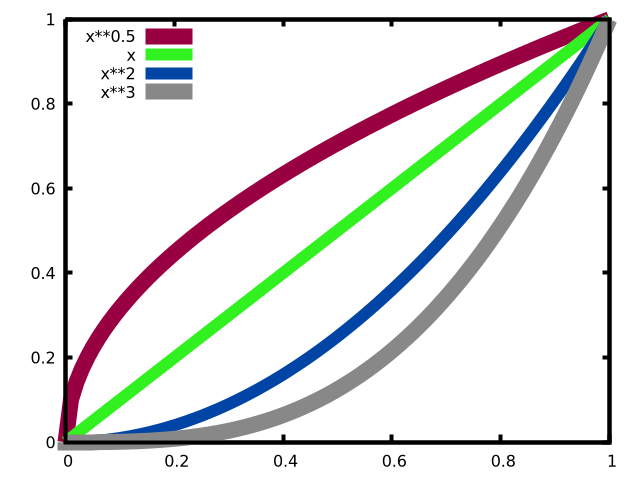

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [33]:
(defun styling-curves-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo solid lw 4) :xrange '(0 1))
    (gp :set :key '(top left))
    (gp :set :style '(:line 1 lt 3 lw 4 lc rgb ("'#990042'")))
    (gp :set :style '(:line 2 lt 7 lw 3 lc rgb ("'#31f120'")))
    (gp :set :style '(:line 3 lt 2 lw 3 lc rgb ("'#0044a5'")))
    (gp :set :style '(:line 4 lt 9 lw 4 lc rgb ("'#888888'")))
    (plot "x**0.5" :ls 1)
    (plot "x"      :ls 2)
    (plot "x**2"   :ls 3)
    (plot "x**3"   :ls 4))
  output)
(png-from-file (styling-curves-plot "images/styling-curves-plot.png"))


STYLING-CURVES--USERSTYLES-PLOT

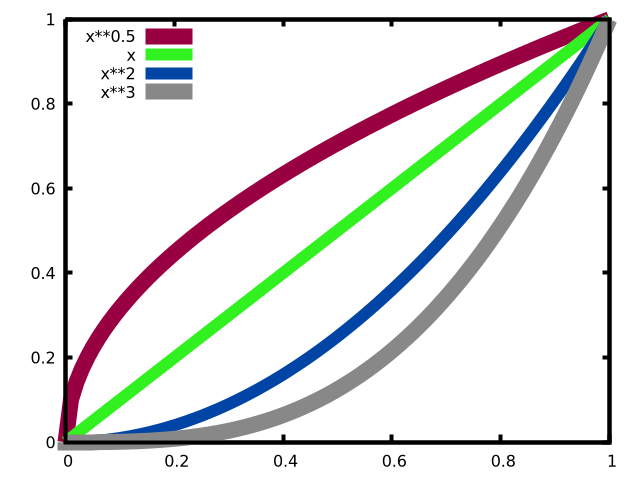

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [34]:
(defun styling-curves--userstyles-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo solid lw 4) :xrange '(0 1))
    (gp :set :key '(top left))
    (gp :set :style '(increment userstyles))
    (gp :set :style '(:line 1 lt 3 lw 4 lc rgb ("'#990042'")))
    (gp :set :style '(:line 2 lt 7 lw 3 lc rgb ("'#31f120'")))
    (gp :set :style '(:line 3 lt 2 lw 3 lc rgb ("'#0044a5'")))
    (gp :set :style '(:line 4 lt 9 lw 4 lc rgb ("'#888888'")))
    (plot "x**0.5")
    (plot "x"     )
    (plot "x**2"  )
    (plot "x**3"  ))
  output)
(png-from-file
 (styling-curves--userstyles-plot
  "images/styling-curves--userstyles-plot.png"))


TRANSPARENCY-PLOT

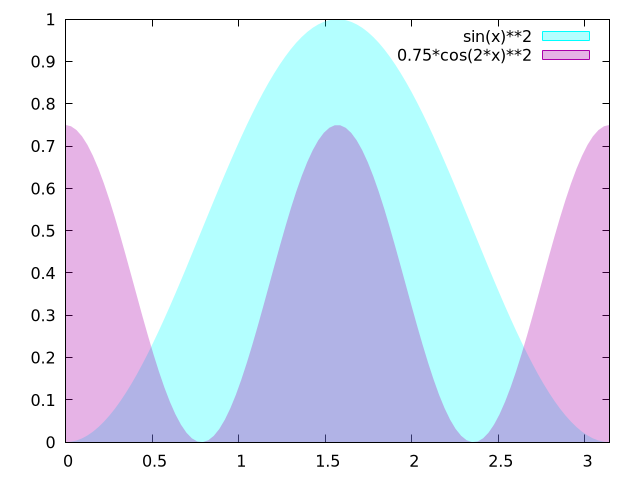

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [35]:
(defun transparency-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :style '(fill transparent solid 0.3))
    (plot
     "[0:pi] sin(x)**2 with filledcurves above y1=0 lc rgb '#00ffff', 0.75*cos(2*x)**2 with filledcurves above y1=0 lc rgb '#aa00aa'"))
  output)
(png-from-file (transparency-plot "images/transparency-plot.png"))


PLOTTING-POINTS-WITH-CURVES-PLOT

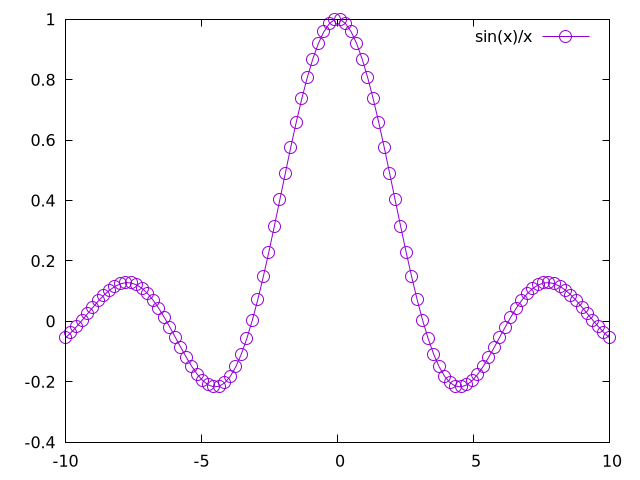

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [36]:
(defun plotting-points-with-curves-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (plot "sin(x)/x with linespoints ps 2 pt 6"))
  output)
(png-from-file
 (plotting-points-with-curves-plot
  "images/plotting-points-with-curves-plot.png"))


CHANGING-THE-POINT-STYLE-PLOT

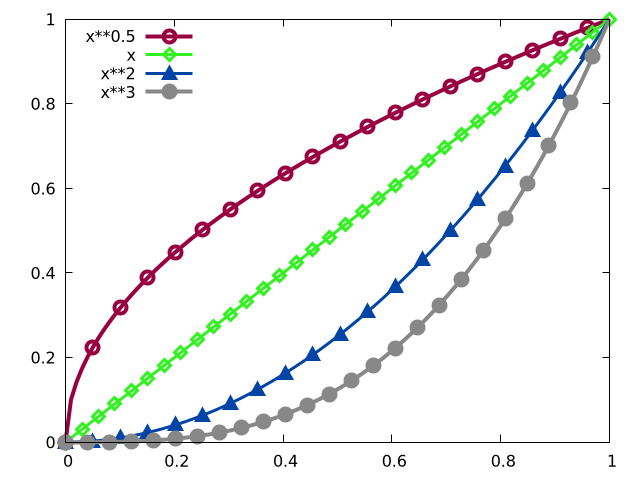

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [37]:
(defun changing-the-point-style-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :key '(top left))
    (gp :set :style '#'linespoints)
    (gp :set :style '(line 1 lw 4 lc rgb ("'#990042'") ps 2 pt 6 pi 5))
    (gp :set :style '(line 2 lw 3 lc rgb ("'#31f120'") ps 2 pt 12 pi 3))
    (gp :set :style '(line 3 lw 3 lc rgb ("'#0044a5'") ps 2 pt 9 pi 5))
    (gp :set :style '(line 4 lw 4 lc rgb ("'#888888'") ps 2 pt 7 pi 4))
    (plot "[0:1] x**0.5 ls 1, x ls 2, x**2 ls 3, x**3 ls 4"))
  output)
(png-from-file
 (changing-the-point-style-plot "images/changing-the-point-style-plot.png"))


PLOTTING-WITH-OBJECTS-PLOT

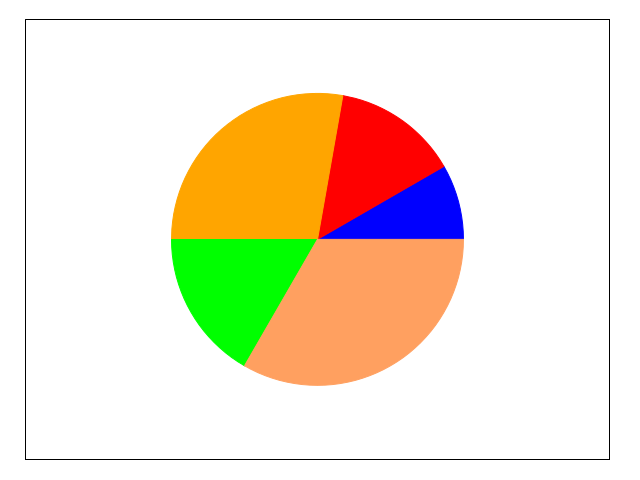

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [38]:
(defun plotting-with-objects-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :object
              '(1 circle at graph |0.5 , 0.5| size graph 0.25 fillcolor rgb
                ("'blue'") fillstyle solid arc |[0:30]| front)
              :object
              '(2 circle at graph |0.5 , 0.5| size graph 0.25 fillcolor rgb
                ("'red'") fillstyle solid arc |[30:80]| front)
              :object
              '(3 circle at graph |0.5 , 0.5| size graph 0.25 fillcolor rgb
                ("'orange'") fillstyle solid arc |[80:180]| front)
              :object
              '(4 circle at graph |0.5 , 0.5| size graph 0.25 fillcolor rgb
                ("'green'") fillstyle solid arc |[180:240]| front)
              :object
              '(5 circle at graph |0.5 , 0.5| size graph 0.25 fillcolor rgb
                ("'sandybrown'") fillstyle solid arc |[240:360]| front))
    (gp :unset :key)
    (gp :unset :tics)
    (plot "[0:1][0:1] -1"))
  output)
(png-from-file
 (plotting-with-objects-plot "images/plotting-with-objects-plot.png"))


# 4 Controlling Your Tics



ADDING-MINOR-TICS-PLOT

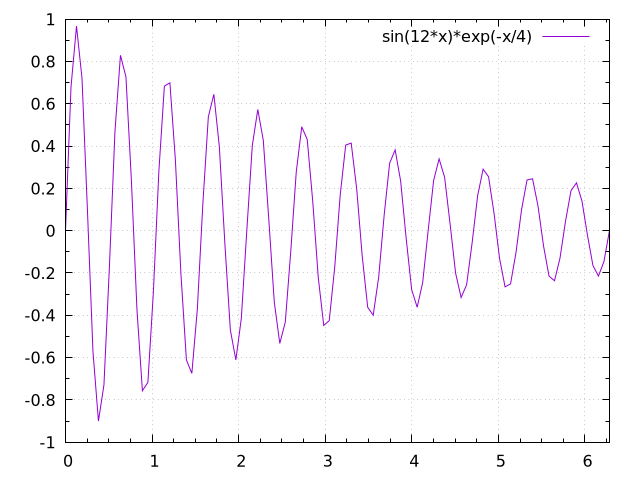

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [39]:
(defun adding-minor-tics-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :grid 'nil)
    (gp :set :mxtics 4)
    (gp :set :mytics 2)
    (plot "[0:2*pi] sin(12*x)*exp(-x/4)"))
  output)
(png-from-file (adding-minor-tics-plot "images/adding-minor-tics-plot.png"))


PLACING-TICS-ON-SECOND-Y-AXIS-PLOT

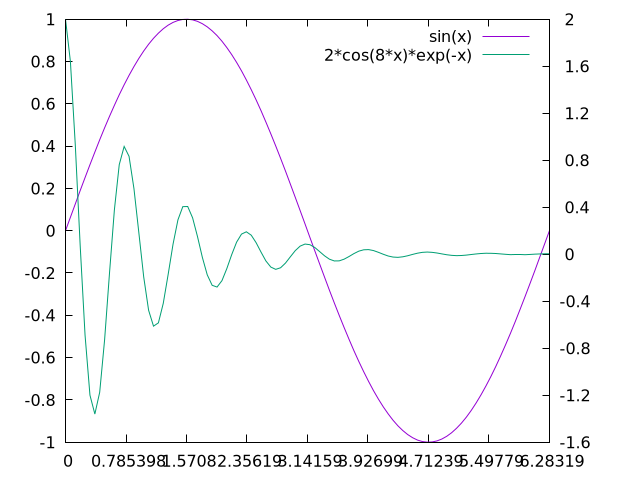

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [40]:
(defun placing-tics-on-second-y-axis-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo)) ;
    (gp :set :ytics 'nomirror)
    (gp :set :y2tics 0.4)
    (gp :set :xtics '("pi/4."))
    (plot "[0:2*pi] sin(x) axis x1y1, 2*cos(8*x)*exp(-x) axis x1y2"))
  output)
(png-from-file
 (placing-tics-on-second-y-axis-plot
  "images/placing-tics-on-second-y-axis-plot.png"))


ADJUSTING-THE-TIC-SIZE-PLOT

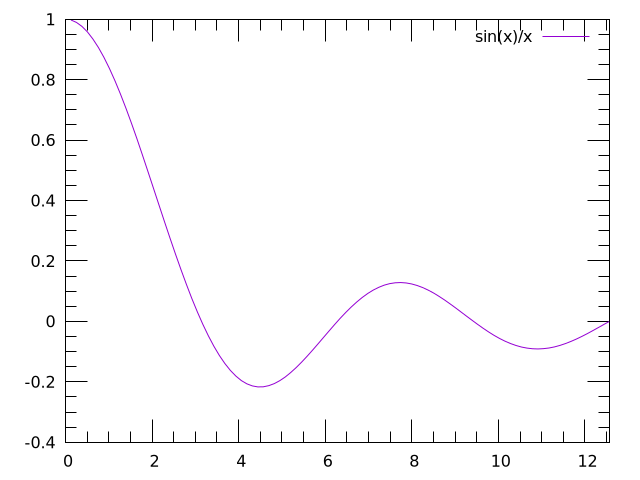

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [41]:
(defun adjusting-the-tic-size-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output
              :terminal '(pngcairo)) ;
    (gp :set :tics '(scale 3))
    (gp :set :mxtics 4)
    (gp :set :mytics 4)
    (plot "[0:4*pi] sin(x)/x"))
  output)

(png-from-file
 (adjusting-the-tic-size-plot "images/adjusting-the-tic-size-plot.png"))


REMOVING-ALL-TICS-PLOT

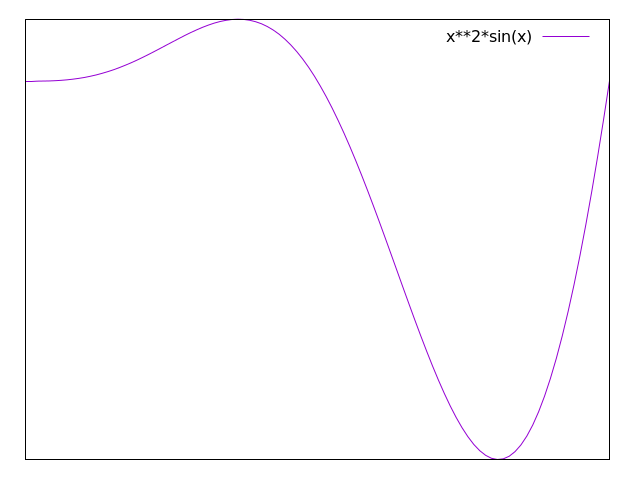

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [42]:
(defun removing-all-tics-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :tics)
    (plot "[0:2*pi] x**2*sin(x)"))
  output)
(png-from-file (removing-all-tics-plot "images/removing-all-tics-plot.png"))


DEFINING-TIC-VALUES-PLOT

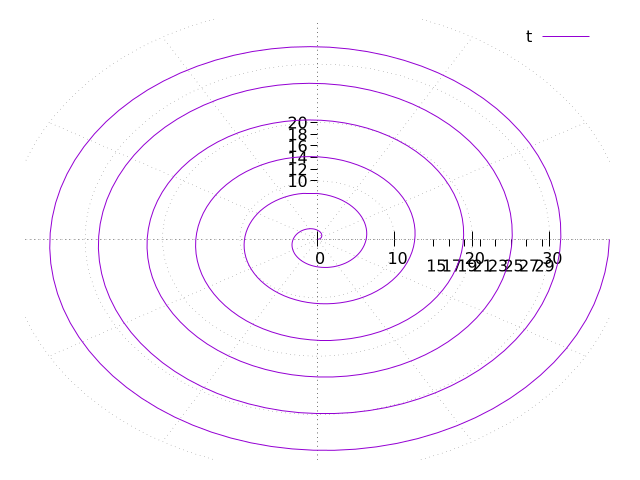

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [43]:
(defun defining-tic-values-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo)) ;
    (gp :unset :border)
    (gp :set :xtics :axis :nomirror)
    (gp :set :ytics :axis :nomirror)
    (gp :set :zeroaxis)
    (gp :set :polar)
    (gp :set :samples 500) 
    (gp :set :grid)
    (gp :unset :raxis)
    (gp :set :xtics '(15 2 30))
    (gp :set :ytics '(10 2 20))
    (plot "[0:12*pi] t"))
  output)

(png-from-file
 (defining-tic-values-plot "images/defining-tic-values-plot.png"))


MAKING-THE-TICS-STICK-OUT-PLOT

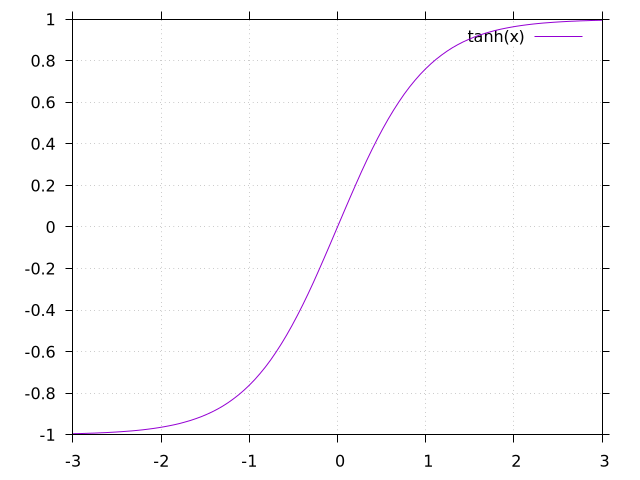

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [44]:
(defun making-the-tics-stick-out-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :tics 'out)
    (gp :set :grid 'nil)
    (plot "[-3:3] tanh(x)"))
  output)
(png-from-file
 (making-the-tics-stick-out-plot "images/making-the-tics-stick-out-plot.png"))


SETTING-MANUAL-TICS-PLOT

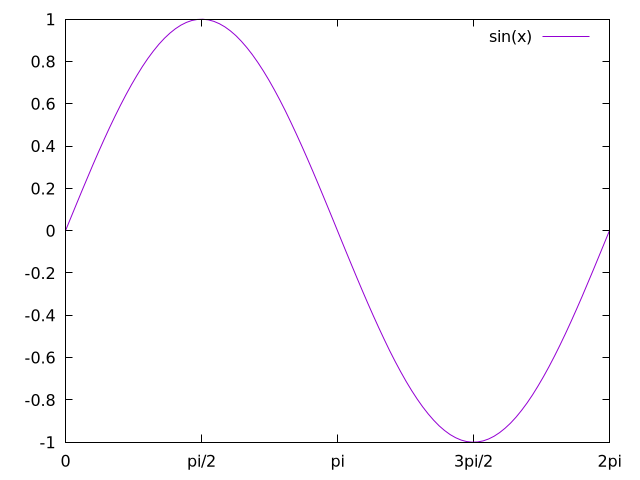

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [45]:
(defun setting-manual-tics-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :xtics '|('pi' pi, 'pi/2' pi/2, '2pi' 2*pi, '3pi/2' 3*pi/2, "0" 0)|)
    (plot "[0:2*pi] sin(x)"))
  output)
(png-from-file
 (setting-manual-tics-plot "images/setting-manual-tics-plot.png"))


SETTING-MANUAL-TICS-ENHANCED-PLOT

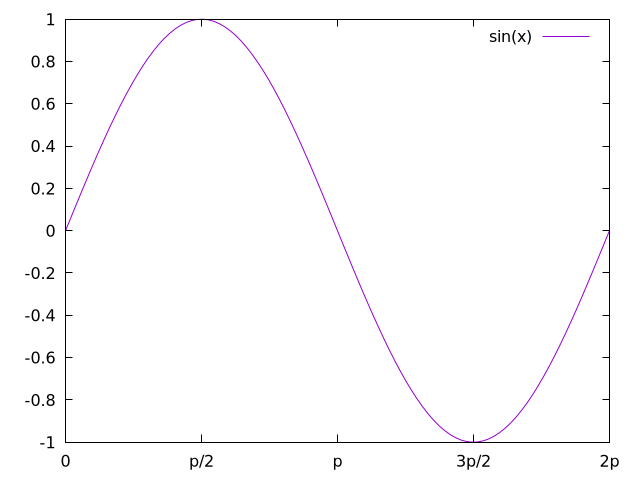

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [46]:
(defun setting-manual-tics-enhanced-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced))
    (gp :set :xtics '|('{/symbol p}' pi, '{/symbol p}/2' pi/2, '2{/symbol p}' 2*pi, '3{/symbol p}/2' 3*pi/2, "0" 0)|)
    (plot "[0:2*pi] sin(x)"))
  output)
(png-from-file
 (setting-manual-tics-enhanced-plot
  "images/setting-manual-tics-enhanced-plot.png")
)


SETTING-MANUAL-TICS-ENHANCED-ADD-PLOT

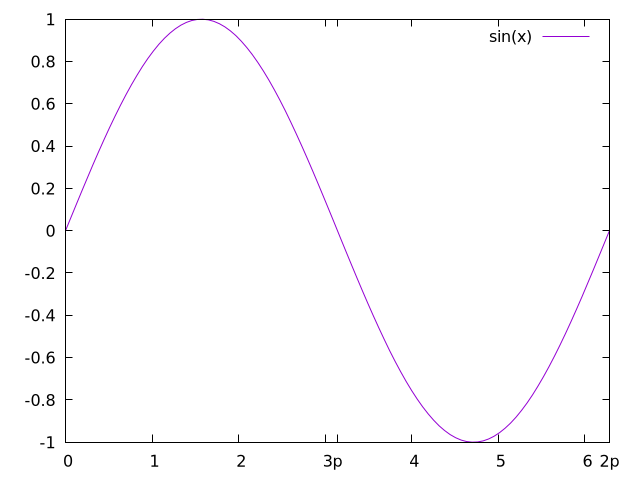

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [47]:
(defun setting-manual-tics-enhanced-add-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced))
    (gp :set :xtics :add '|('{/symbol p}' pi, '2{/symbol p}' 2*pi)|)
    (plot "[0:2*pi] sin(x)"))
  output)
(png-from-file
 (setting-manual-tics-enhanced-add-plot
  "images/setting-manual-tics-enhanced-add-plot.png"))


PLOTTING-WITH-DATES-AND-TIMES-PLOT

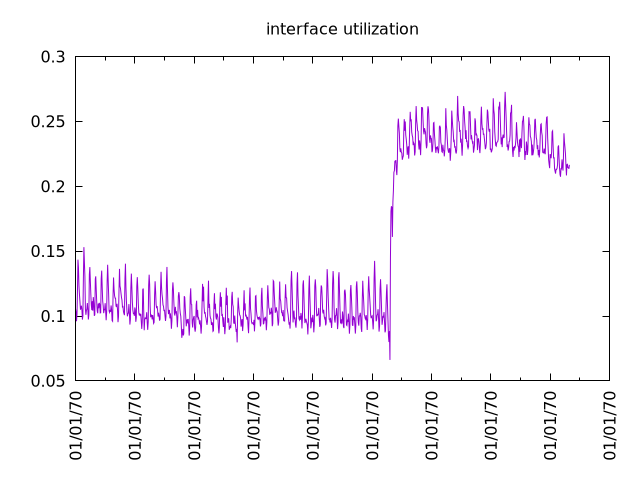

In [48]:
(defun plotting-with-dates-and-times-plot (output)
  (let ((datastream
         (clml.utility.data:fetch
          "https://mmaul.github.io/clml.data/sample/traffic-balance.csv"
          :stream t)))
    (with-plots (s :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (gp :set :title "interface utilization")
      (gp :set :xdata 'time)
      (gp :set :timefmt "%y/%m/%d:%h:%m:%s")
      (gp :set :format '(x "%d/%m/%y"))
      (gp :set :xtics '(rotate))
      (gp :unset :key)
      (let ((data (subseq (clml.utility.csv:read-csv-stream datastream :type-spec '(string float float float float float float))
                          0 1000)))
        (plot
          (lambda ()
             (loop for row across data
                   do (format s "~&~a ~{~a~^ ~}"
                              (map 'string
                                   (lambda (x)
                                     (if (equal #\  x)
                                         #\:
                                         x))
                                   (elt row 0))
                              (coerce (subseq row 1) 'list))))
           :using '(0 5) :with 'lines))))
  output)
(png-from-file
 (plotting-with-dates-and-times-plot
  "images/plotting-with-dates-and-times-plot.png"))


The plot below requires gnuplot version 5



CHANGING-LANGUAGE-USED-IN-LABELS-PLOT

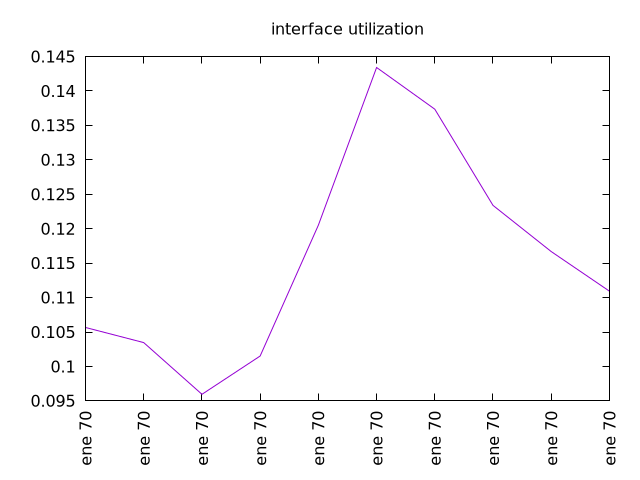

In [49]:
(defun changing-language-used-in-labels-plot (output)
  (let ((datastream
         (clml.utility.data:fetch
          "https://mmaul.github.io/clml.data/sample/traffic-balance.csv"
          :stream t)))
    (with-plots (s :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (gp :set :title "interface utilization")
      (gp :set :xdata 'time)
      (gp :set :locale "es_ES.utf8")
      (gp :set :timefmt "%y/%m/%d:%h:%m:%s")
      (gp :set :format '(x "%b %y"))
      (gp :set :xtics '(rotate))
      (gp :unset :key)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream datastream :type-spec
                                                                 '(string float
                                                                          float
                                                                          float
                                                                          float
                                                                          float
                                                                          float))
                               0 10)
               do (format s "~&~a ~{~a~^ ~}"
                          (map 'string
                               (lambda (x)
                                 (if (equal #\  x)
                                     #\:
                                     x))
                               (elt row 0))
                          (coerce (subseq row 1) 'list))))
       :using '(0 5) :with 'lines)))
  output)
(png-from-file
 (changing-language-used-in-labels-plot
  "images/changing-language-used-in-labels-plot.png"))


The plot below requires gnuplot version 5



USING-EUROPEAN-STYLE-DECIMALS-PLOT

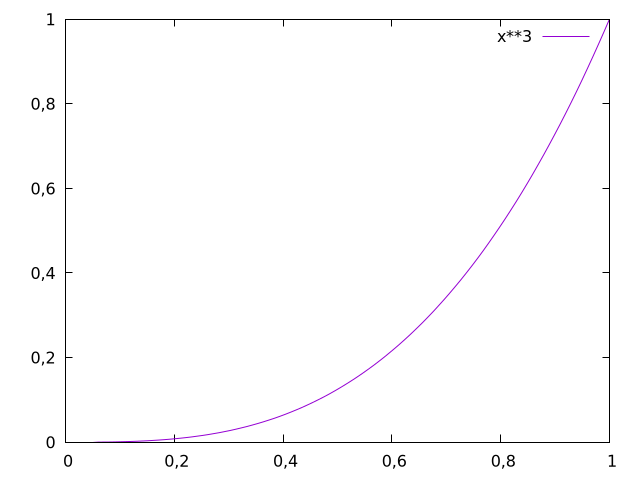

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [50]:
(defun using-european-style-decimals-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :decimalsign '(locale "es_ES.utf8"))
    (plot "[0:1] x**3"))
  output)
(png-from-file
 (using-european-style-decimals-plot
  "images/using-european-style-decimals-plot.png"))


FORMATTING-TIC-LABELS-PLOT

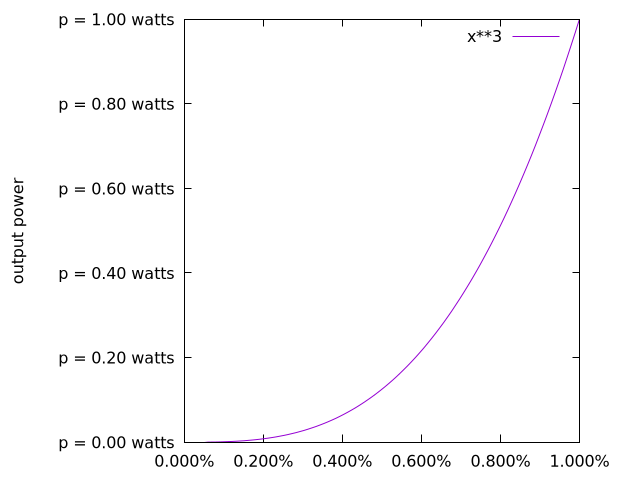

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [51]:
(defun formatting-tic-labels-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :ylabel "output power")
    (gp :set :format '(y "p = %.2f watts"))
    (gp :set :format '(x "%.3f%%"))
    (gp :set :rmargin 6)
    (plot "[0:1] x**3"))
  output)
(png-from-file
 (formatting-tic-labels-plot "images/formatting-tic-labels-plot.png"))


TIC-NO-LABELS-PLOT

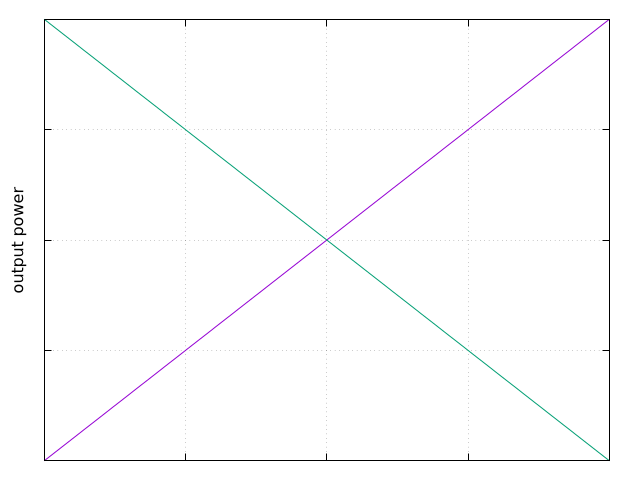

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [52]:
(defun tic-no-labels-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced))
    (gp :set :ylabel "output power")
    (gp :set :format '(y ""))
    (gp :set :format '(x ""))
    (gp :set :grid)
    (gp :unset :key)
    (plot "x, -x"))
  output)
(png-from-file (tic-no-labels-plot "images/tic-no-labels-plot.png"))


#5 Combining Multiple Plots



MULTIPLOT

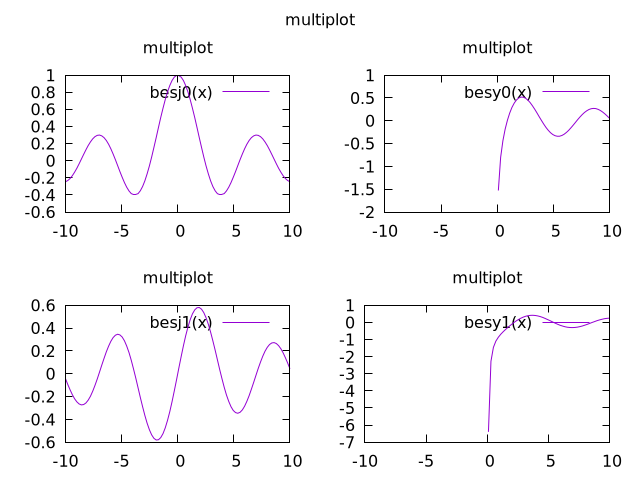

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [53]:
(defun multiplot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "multiplot"
              :multiplot (list "layout 2,2 columnsfirst title \"multiplot\""))
    (plot "besj0(x)")
    (plot "besj1(x)")
    (plot "besy0(x)")
    (plot "besy1(x)")
    (gp :unset 'multiplot))
  output)
(png-from-file (multiplot "images/multiplot.png"))


STEM-MULTIPLOT

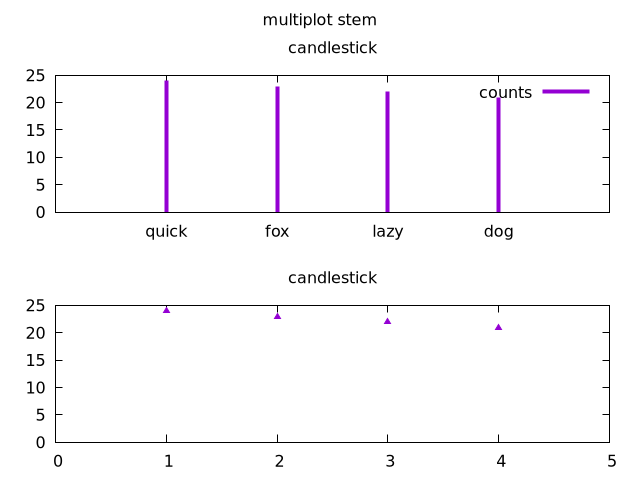

In [54]:
(defun stem-multiplot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(:pngcairo) :title "candlestick"
              :xrange '(0 5) :yrange '(0 25) :multiplot
              (list "layout 2,1 columnsfirst title \"multiplot stem\""))
    
    (flet ((data ()
             (loop for r in '((1 5 7 10 15 24 0.3 "quick")
                              (2 6 8 11 16 23 0.4 "fox")
                              (3 5 7 11 17 22 0.5 "lazy")
                              (4 6 9 10 18 21 0.3 "dog"))
                 do (format s "~&~{~^~a ~}" r))))
    (plot #'data :using '(1 6 |xticlabels(8)|) :with :impulses :lw 4 :title "counts")
    (plot #'data :using '(1 6) :with :points :pt 9 :notitle ())
    (gp :unset 'multiplot)))
  output)
(png-from-file (stem-multiplot "images/stem-multiplot.png"))


PLOT-POSITIONING-PLOT

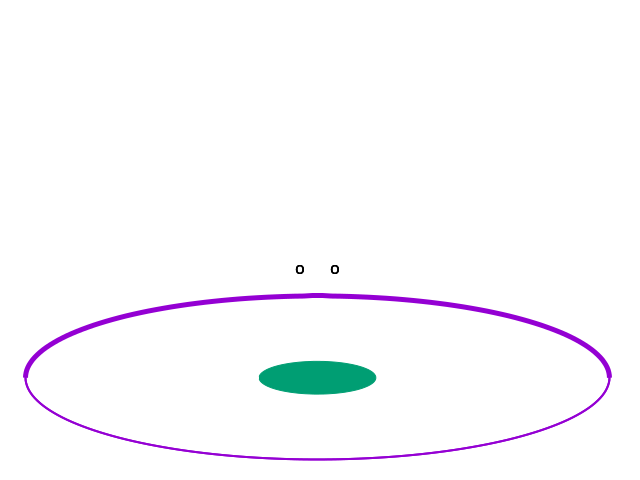

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.



" set terminal pngcairo 
 set output \"images/plot-positioning.png\" 
 set multiplot  
 set title \"o     o\" 
 set polar  
 set size 1,.5 
 set border 0 
 unset key 
 unset tics 
 unset raxis 
plot [pi:2*pi] -1 lw 5
plot -2*pi lw 2, .2 with filledcurves
plot 1 lw 2, .2 with filledcurves
 set title \"###################\" 
 set origin 0,.5 
 set size .5, .5 
 set origin .5, .5 
 set title \"###################\" 
 unset multiplot 
set output" 

In [55]:
(defun plot-positioning-plot (output)
  (with-plots (s :debug t)
    (gp-setup :output output :terminal '(:pngcairo) :multiplot (list ""))
    (gp :set :title "o     o")
    (gp :set :polar 'nil)
    (gp :set :size (list "1,.5"))
    (gp :set :border 0)
    (gp :unset :key)
    (gp :unset :tics)
    (gp :unset :raxis)
    (plot "[pi:2*pi] -1" :lw 5)
    (gp :set :title "###################")
    (gp :set :origin (list "0,.5"))
    (gp :set :size (list ".5, .5"))
    (plot "-2*pi" :lw (list "2, .2") :with 'filledcurves)
    (gp :set :origin (list ".5, .5"))
    (gp :set :title "###################")
    (plot "1" :lw (list "2, .2") :with 'filledcurves)
    (gp :unset 'multiplot))
  output)
(png-from-file (plot-positioning-plot "images/plot-positioning.png"))


INSET-PLOT

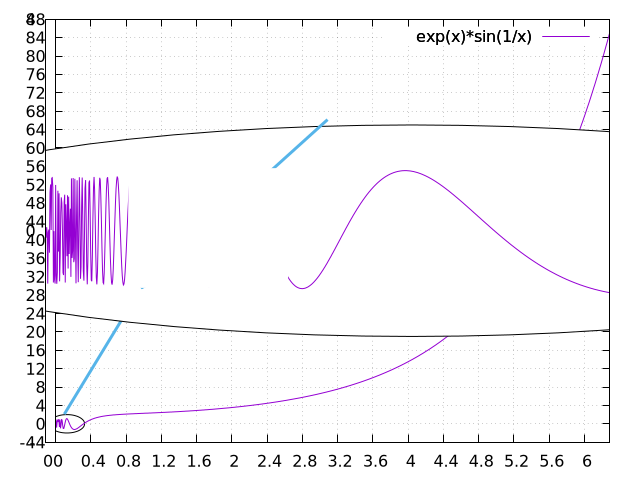

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.



" set terminal pngcairo 
 set output \"images/inset-plot.png\" 
 set multiplot  
 set object ellipse center 0.13,0 size 0.4,4 
 set arrow from 0.1,2.1 to screen 0.22,0.4 front lt 3 lw 3 
 set samples 1000 
 set grid  
 set xtics 0.4 
 set ytics 4 
plot [0:2*pi] exp(x)*sin(1/x)
plot [0:.2] exp(x)*sin(1/x)
 set origin 0.2,0.4 
 set size 0.25,0.25 
 clear 
 unset grid 
 unset object 
 unset arrow 
 set xtics 0.1 
 set ytics 0.5 
 set bmargin 1 
 set tmargin 1 
 set lmargin 3 
 set rmargin 1 
 unset multiplot 
set output" 

In [56]:
(defun inset-plot (output)
  (with-plots (s :debug t)
    (gp-setup :output output :terminal '(:pngcairo) :multiplot (list ""))
    (gp :set :object :ellipse :center '(0.13 0) :size '(0.4 4))
    (gp :set :arrow :from '(0.1 2.1) :to :screen '(0.22 0.4) :front :lt 3 :lw 3)
    (gp :set :samples 1000)
    (gp :set :grid 'nil)
    (gp :set :xtics 0.4)
    (gp :set :ytics 4)
    (plot "[0:2*pi] exp(x)*sin(1/x)")
    (gp :set :origin '(0.2 0.4))
    (gp :set :size '(0.25 0.25))
    (gp :clear)
    (gp :unset :grid)
    (gp :unset :object)
    (gp :unset :arrow)
    (gp :set :xtics 0.1)
    (gp :set :ytics 0.5)
    (gp :set :bmargin 1)
    (gp :set :tmargin 1)
    (gp :set :lmargin 3)
    (gp :set :rmargin 1)      
    (plot "[0:.2] exp(x)*sin(1/x)")
    (gp :unset 'multiplot))
  output)
(png-from-file (inset-plot "images/inset-plot.png"))


MULTIPLOT-W-LABELS-AND-ARROWS

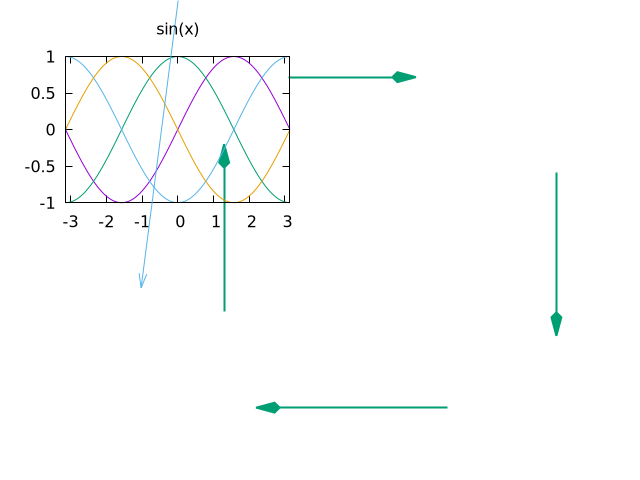

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.



" set terminal pngcairo 
 set output \"images/multiplot-w-labels-and-arrows.png\" 
 set title \"derivatives of sin(x)\" 
 set font \"times-roman, 22\" 
 set multiplot layout 2,2 
 unset key 
 set xrange [-pi:pi] 
 set arrow from 0.1,2.1 to screen 0.22,0.4 front lt 3 
 set style arrow 1 head filled size screen 0.03,15,135 lt 2 lw 2 
 set arrow from screen 0.45,0.84 to screen 0.65,0.84 arrowstyle 1 
 set arrow from screen 0.87,0.64 to screen 0.87,0.3 arrowstyle 1 
 set arrow from screen 0.7,0.15 to screen 0.4,0.15 arrowstyle 1 
 set arrow from screen 0.35,0.35 to screen 0.35,0.7 arrowstyle 1 
 set title \"sin(x)\" 
plot sin(x), cos(x), -cos(x), -sin(x)
 set title \"sin'(x) = cos(x)\" 
 set title \"sin'''(x) = cos''(x) = -sin'(x) = -cos(x)\" 
 set title \"sin''(x) = cos'(x) = -sin(x)\" 
 unset multiplot 
set output" 

In [57]:
(defun multiplot-w-labels-and-arrows (output)
  (with-plots (s :debug t)
    (gp-setup :output output
              :terminal '(pngcairo)
              :title "derivatives of sin(x)"
              :font "times-roman, 22")

    (gp :set :multiplot :layout '(2 2))
    (gp :unset :key)
    (gp :set :xrange '(-pi pi))
    (gp :set :arrow
        :from '(0.1 2.1) :to :screen '(0.22 0.4) :front :lt 3)
    (gp :set :style
        :arrow 1 :head :filled :size :screen '(0.03 15 135) :lt 2 :lw 2)
    (gp :set :arrow
        :from :screen '(0.45 0.84) :to :screen '(0.65 0.84) :arrowstyle 1)
    (gp :set :arrow
        :from :screen '(0.87 0.64) :to :screen '(0.87 0.3) :arrowstyle 1)
    (gp :set :arrow
        :from :screen '(0.7 0.15) :to :screen '(0.4 0.15) :arrowstyle 1)
    (gp :set :arrow
        :from :screen '(0.35 0.35) :to :screen '(0.35 0.7) :arrowstyle 1)
    (gp :set :title "sin(x)")
    (plot "sin(x)")
    (gp :set :title "sin'(x) = cos(x)")
    (plot "cos(x)")
    (gp :set :title "sin'''(x) = cos''(x) = -sin'(x) = -cos(x)")
    (plot "-cos(x)")
    (gp :set :title "sin''(x) = cos'(x) = -sin(x)")
    (plot "-sin(x)")
    (gp :unset :multiplot))
  output)
(png-from-file
 (multiplot-w-labels-and-arrows "images/multiplot-w-labels-and-arrows.png"))


#7 Proramming gnuplot and dealing with data



PLOTTING-ON-SUB-INTERVALS-PLOT

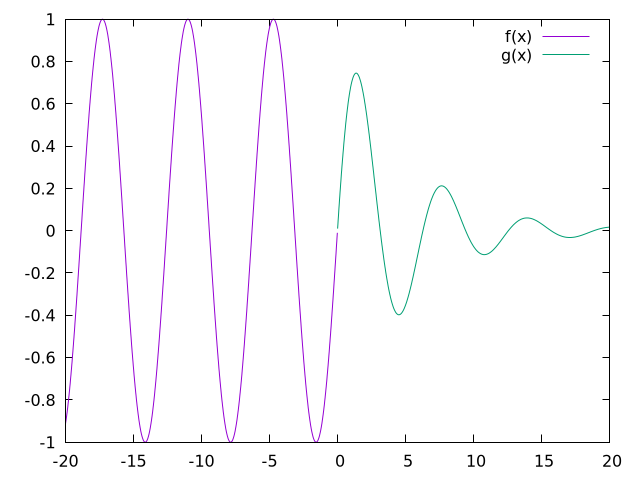

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [58]:
(defun plotting-on-sub-intervals-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :terminal '(pngcairo) :output output)
    (gp :set :samples 2000)
    (gp '|f(x) = x < 0 ? sin(x) : NaN|)
    (gp '|g(x) = x >= 0 ? exp(-x/5.)*sin(x) : NaN|)
    (plot "[-20 : 20] f(x), g(x)"))
  output)
(png-from-file
 (plotting-on-sub-intervals-plot "images/plotting-on-sub-intervals-plot.png"))


Not working needs to repeat data section again for smoothing, but look for fix in the future



In [59]:
(defun smoothing-your-data-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (s :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 300)
               do (format s "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(0 4) :with
       '(lines lw 0.5 notitle #\, ("''") smooth bezier lw 4 title
         "bezier smoothed"))))
  output)
;(png-from-file
; (smoothing-your-data-plot "images/smoothing-your-data-plot.png"))


SMOOTHING-YOUR-DATA-PLOT

Not working needs to repeat data section again for smoothing, but look for fix in the future



In [60]:
(defun fit-functions-to-your-data-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (s :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (format s "~&f(x) = a*sin(b*x)~%")
      (format s "~&fit f(x) 'rs.dat' via a, b~%")
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 300)
               do (format s "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(0 4) :with
       '(lines lw 0.5 notitle #\, f (x) lw 4 title " fit by gnuplot"))))
  output)
;(png-from-file
; (fit-functions-to-your-data-plot
;  "images/fit-functions-to-your-data-plot.png"))


FIT-FUNCTIONS-TO-YOUR-DATA-PLOT

Not working needs to repeat data section again for smoothing, but look for fix in the future



In [61]:
(defun using-kdensity-to-improve-on-histograms-plot (output)
  (let ((s
         (clml.utility.data:fetch
          "http://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q=ibm"
          :stream t)))
    (clml.utility.data:process-finance-header s)
    (with-plots (s :debug nil)
      (gp-setup :terminal '(pngcairo) :output output)
      (format s "~&f(x) = a*sin(b*x)~%")
      (format s "~&fit f(x) 'rs.dat' via a, b~%")
      (plot
       (lambda ()
         (loop for row across (subseq
                               (clml.utility.csv:read-csv-stream s :type-spec
                                                                 '(float float
                                                                         float
                                                                         float
                                                                         float
                                                                         float))
                               0 300)
               do (format s "~&~{~a~^ ~}" (coerce row 'list))))
       :using '(("1:(.001)") smooth kdensity))))
  output)
;(png-from-file
; (using-kdensity-to-improve-on-histograms-plot
;  "images/using-kdensity-to-improve-on-histograms-plot.png"))


USING-KDENSITY-TO-IMPROVE-ON-HISTOGRAMS-PLOT

#8 Third dimension



3D-PLOT

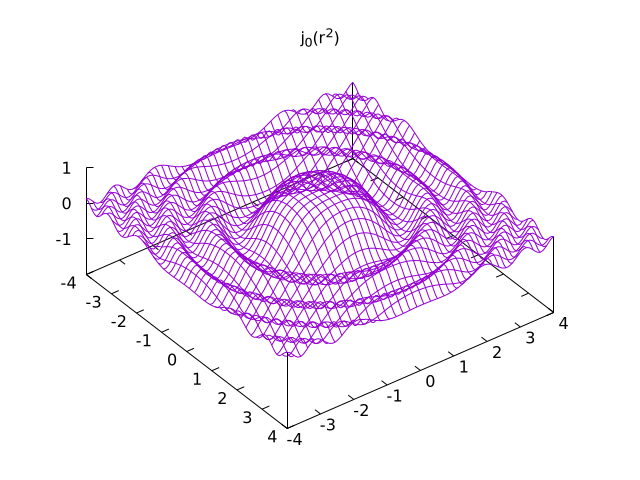

In [62]:
(defun 3d-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :isosamples 40)
    (gp :set :title "j_0(r^2)")
    (gp :set :xrange '(-4 4))
    (gp :set :yrange '(-4 4))
    (gp :set :ztics 1)
    (gp :set :view '(29 53))
    (splot "besj0(x**2+y**2)")
    (format s "~&replot~%"))
  output)
(png-from-file (3d-plot "images/3d-plot.png"))


PM3D-PLOT

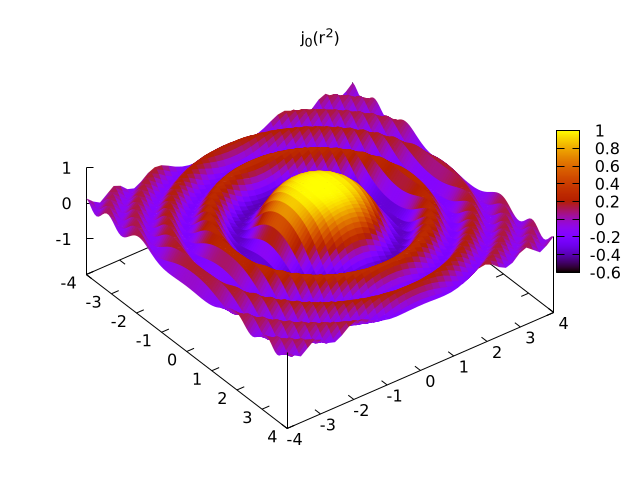

In [63]:
(defun pm3d-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :isosamples 40)
    (gp :set :title "j_0(r^2)")
    (gp :set :xrange '(-4 4))
    (gp :set :yrange '(-4 4))
    (gp :set :ztics 1)
    (gp :set :view '(29 53))
    (gp :set :pm3d 'nil)
    (gp :unset :surface)
    (splot "besj0(x**2+y**2)")
    (format s "~&replot~%"))
  output)
(png-from-file (pm3d-plot "images/pm3d-plot.png"))


PM3D2-PLOT

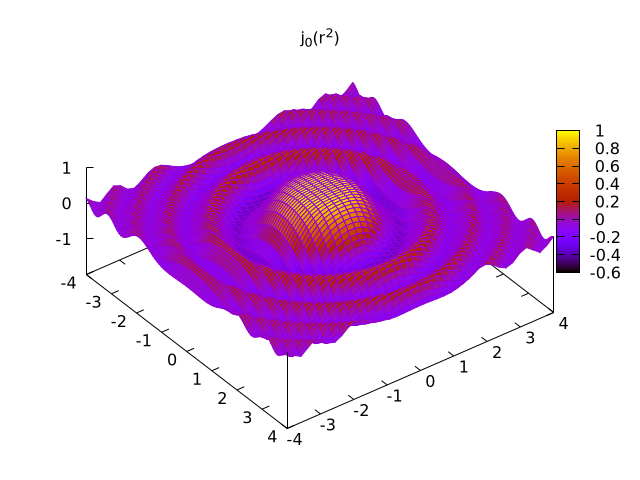

In [64]:
(defun pm3d2-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :isosamples 40)
    (gp :set :title "j_0(r^2)")
    (gp :set :xrange '(-4 4))
    (gp :set :yrange '(-4 4))
    (gp :set :ztics 1)
    (gp :unset :surf)
    (gp :set :view '(29 53))
    (gp :set :style '(line 1 lt 4 lw 0.5))
    (gp :set :pm3d '(at s hidden3d 1))
    (splot "besj0(x**2+y**2)")
    (format s "~&replot~%"))
  output)
(png-from-file (pm3d2-plot "images/pm3d2-plot.png"))


CONTOUR-PLOT

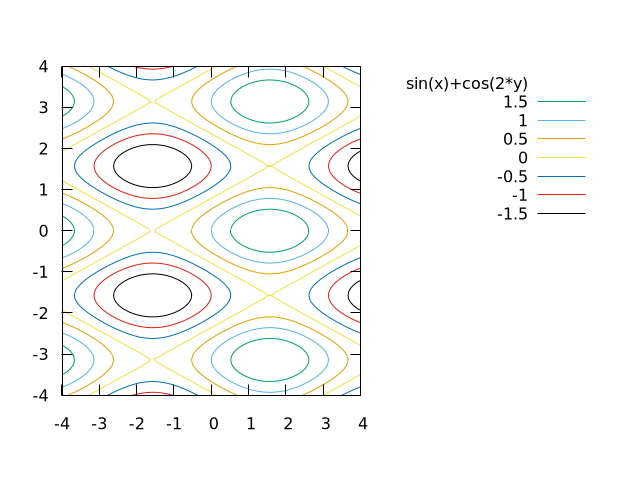

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [65]:
(defun contour-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :cntrparam '(levels 10))
    (gp :set :contour 'base)
    (gp :unset :sur)
    (gp :set :view 'map)
    (gp :set :xrange '(-4 4))
    (gp :set :yrange '(-4 4))
    (gp :set :iso 100)
    (gp :set :samp 100)
    (gp :set :key 'rmargin)
    (splot "sin(x)+cos(2*y)"))
  output)
(png-from-file (contour-plot "images/contour-plot.png"))


CONTOUR-BOTH

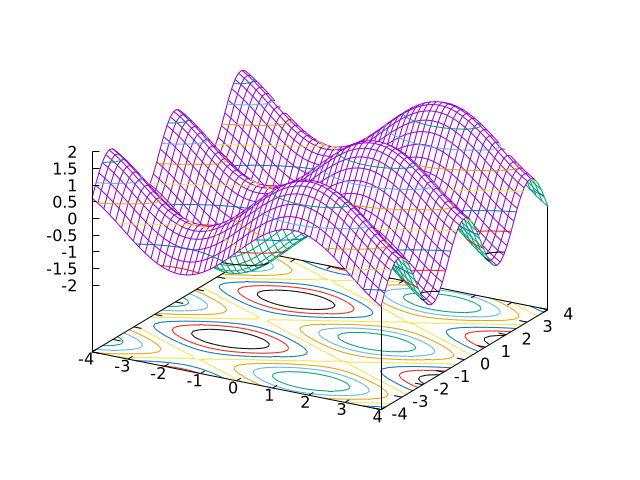

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [66]:
(defun contour-both (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :cntrparam '(levels 10))
    (gp :set :style :line 1 :linecolor '(rgb "#cccccc"))
    (gp :set :contour 'both)
    (gp :set :hidd 'nil)
    (gp :set :iso 50)
    (gp :set :samp 50)
    (gp :set :yrange '(-4 4))
    (gp :set :xrange '(-4 4))
    (splot "sin(x)+cos(2*y)" :with '(lines linestyle 1)))
  output)
(png-from-file (contour-both "images/contour-both.png"))


VECTOR-PLOT

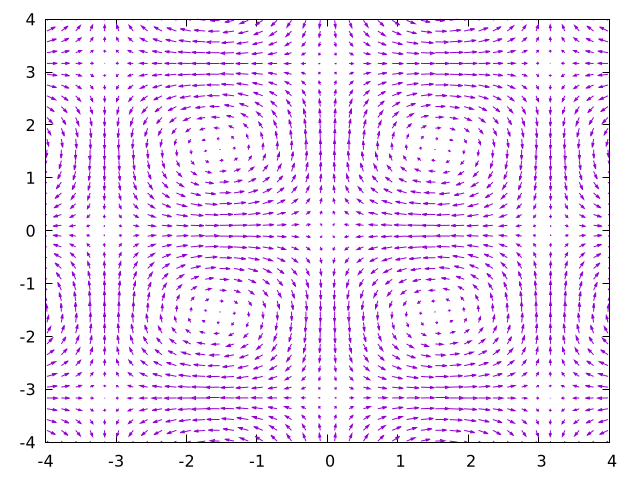

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::VECTOR-PLOT in DEFUN


In [88]:
(defun vector-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '(0 pi))
    (gp :set :yrange '(0 pi))
    (gp :set :iso 20)
    (gp :set :samp 20)
    (gp :a := .2)
    (gp :set :iso 50)
    (gp :set :samp 50)
    (gp :set :yrange '(-4 4))
    (gp :set :xrange '(-4 4))
    (plot "'++'" :using '(1 2 |(-a*sin($1)*cos($2)):(a*cos($1)*sin($2))|)
               :with :vec :size '(0.06 15) :filled ()))
  output)
(png-from-file (vector-plot "images/vector-plot.png"))


VECTOR-CONTOUR-PLOT

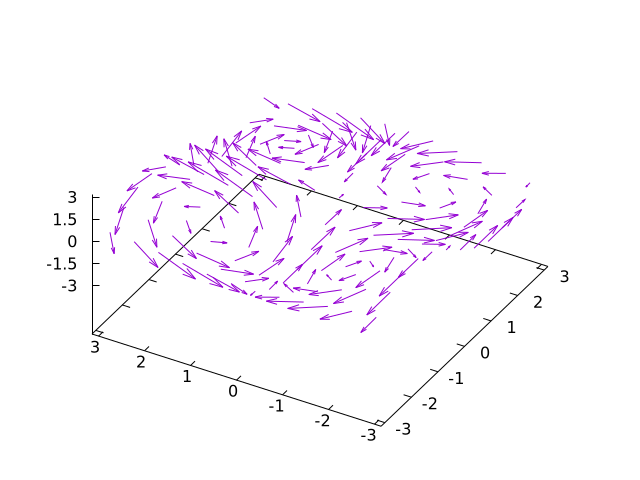

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::VECTOR-CONTOUR-PLOT in DEFUN


In [90]:
(defun vector-contour-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '(-pi pi))
    (gp :set :yrange '(-pi pi))
    (gp :set :zrange '(-pi pi))
    (gp :set :iso 20)
    (gp :set :samp 20)
    (gp :set :ztics 1.5)
    (gp :set :view '(37 300))
    (gp :a := .9)
    (splot "'++'" :using
                (list 1 2 "(2*a*cos($2)*sin($1))" "(-a*sin($1)*cos($2))"
                      "(a*cos($1)*sin($2))" "(a*cos($1))")
                :with :vec))
  output)
(png-from-file (vector-contour-plot "images/vector-contour-plot.png"))


IMAGE-MAP-PLOT

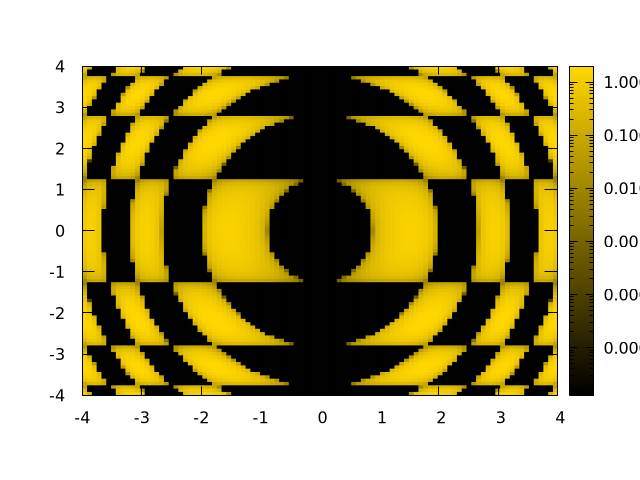

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [69]:
(defun image-map-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '(-4 4))
    (gp :set :yrange '(-4 4))
    (gp :set :iso 100)
    (gp :set :samp 100)
    (gp :set :view 'map)
    (gp :set :pm3d '(at b))
    (gp :set :palette '("defined (0 'black', 1 'gold')"))
    (gp :set :logscale 'cb)
    (gp :unset :surface)
    (splot "sin(y**2+x**2) - cos(x**2)"))
  output)
(png-from-file (image-map-plot "images/image-map-plot.png"))


CONTOURS-IMAGE-MAP-PLOT

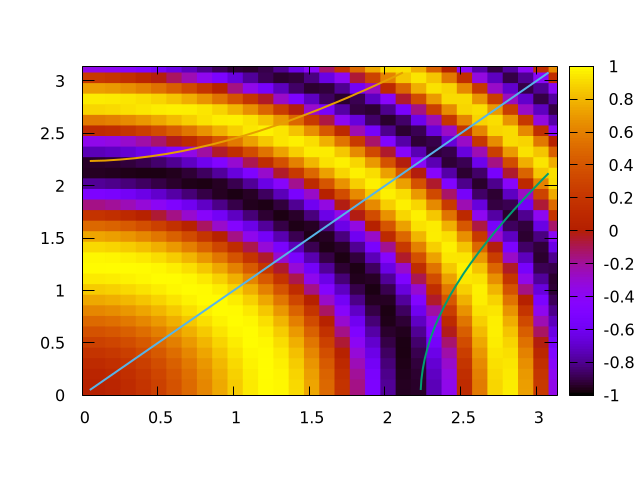

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::CONTOURS-IMAGE-MAP-PLOT in DEFUN


In [91]:
(defun contours-image-map-plot(output)
  (with-plots (s :debug nil)
    (gp-setup :output output
                           :terminal '(pngcairo))
    (gp :unset :key)
    (gp :unset :surface)
    (gp :set :xrange '(0 pi))
    (gp :set :yrange '(0 pi))
    (gp :set :iso 100)
    (gp :set :samp 100)
    (gp :set :cntrparam '(levels 10))
    (gp :set :view 'map)
    (gp :set :pm3d '(at b))
    (gp :set :contour 'base)
     ;:palette '("defined (0 'black', 1 'gold')")
     ;:logscale 'cb
     ;:cbrange "[a : b]"
     
    ;(gp :unset :surface )
    (splot "'++'"
                :using '(1 2 "($1**2-$2**2)" "(sin($1**2+$2**2))")
                :with :lines :lw 2))
  output)
(png-from-file (contours-image-map-plot "images/contours-image-map-plot.png"))


SURFACE-W-IMAGES-PLOT

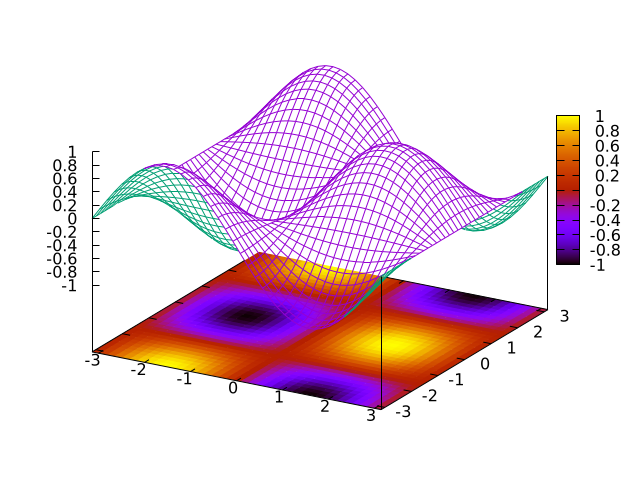

In [71]:
(defun surface-w-images-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :unset :key)
    (gp :set :xrange '(-pi pi))
    (gp :set :yrange '(-pi pi))
    (gp :set :iso 40)
    (gp :set :samp 40)
    (gp :set :hidden 'front)
    (format s "~&f(x,y) = sin(x)*cos(y)~%")
    (splot "f(x,y)" :with (list "pm3d at b, f(x,y)") :with 'lines))
  output)
(png-from-file (surface-w-images-plot "images/surface-w-images-plot.png"))


PATH-IN-3D-PLOT

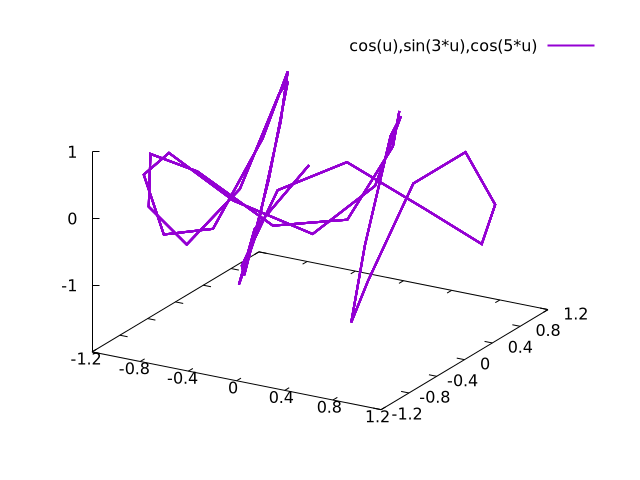

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::PATH-IN-3D-PLOT in DEFUN


In [92]:
(defun path-in-3d-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :xtics 0.4)
    (gp :set :ytics 0.4)
    (gp :set :parametric 'nil)
    (gp :set :samp 40)
    (gp :set :ztics 1)
    (splot "cos(u),sin(3*u),cos(5*u)" :lw 2))
  output)
(png-from-file (path-in-3d-plot "images/path-in-3d-plot.png"))


PARAMETRIC-SURFACES

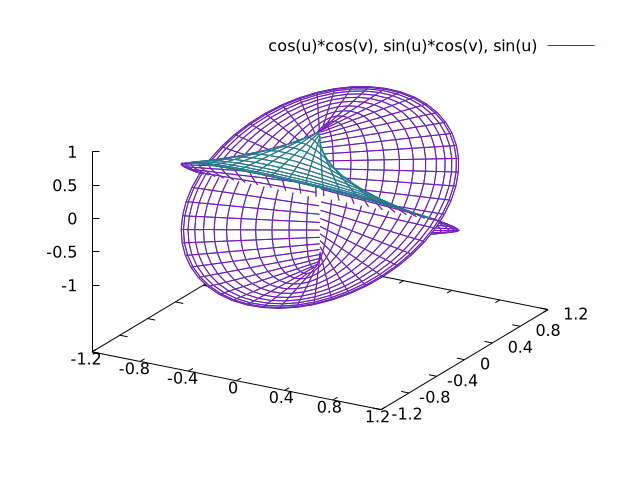

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [73]:
(defun parametric-surfaces (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :param 'nil)
    (gp :set :iso 50)
    (gp :set :ztics 0.5)
    (gp :set :xtics 0.4)
    (gp :set :ytics 0.4)
    (gp :set :urange '(-pi pi))
    (gp :set :vrange '(-pi pi))
    (gp :set :hidd 'nil)
    (splot "cos(u)*cos(v), sin(u)*cos(v), sin(u)"))
  output)
(png-from-file (parametric-surfaces "images/parametric-surfaces.png"))


PARAMETRIC-SURFACES-DEPTHORDER

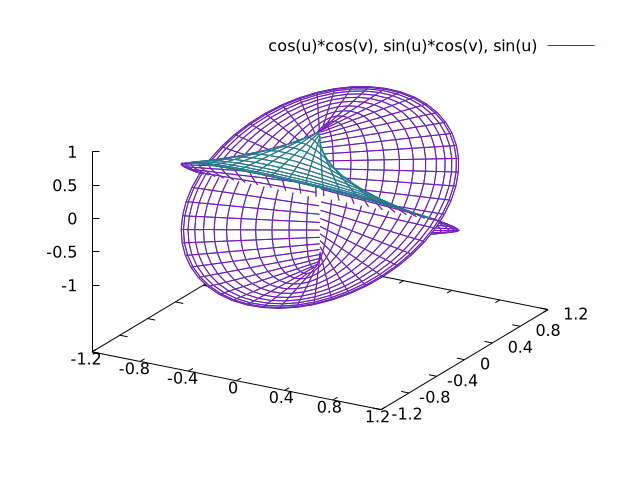

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.


In [74]:
(defun parametric-surfaces-depthorder (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :param 'nil)
    (gp :set :iso 50)
    (gp :set :ztics 0.5)
    (gp :set :xtics 0.4)
    (gp :set :ytics 0.4)
    (gp :set :urange '(-pi pi))
    (gp :set :vrange '(-pi pi))
    (gp :set :hidd 'nil)
    (gp :set :pm3d 'depthorder)
    (splot "cos(u)*cos(v), sin(u)*cos(v), sin(u)"))
  output)
(png-from-file
 (parametric-surfaces-depthorder "images/parametric-surfaces-depthorder.png"))


#10 Surveying Special Topics



ROTATE-LABELS-PLOT

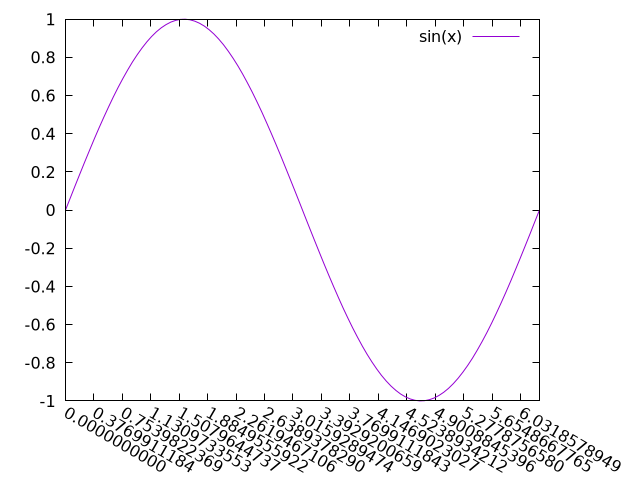

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::ROTATE-LABELS-PLOT in DEFUN


In [102]:
(defun rotate-labels-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :xrange '(0 2*pi))
    (gp :set :xtics '(0 0.12*pi 2*pi) :format "%.10f" :rotate :by -30)
    (gp :set :rmargin 10)
    (plot "sin(x)"))
  output)
(png-from-file (rotate-labels-plot "images/rotate-labels-plot.png"))


LABELS-PLOT

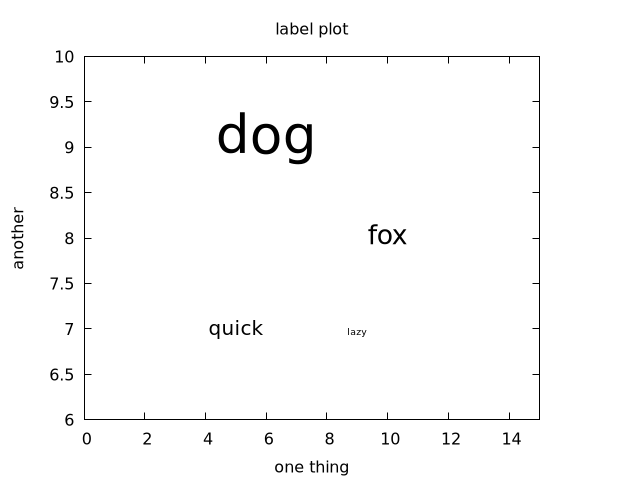

SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::LABELS-PLOT in DEFUN


In [117]:
(defun labels-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo enhanced) 
              :title "label plot")
    (gp :set :xrange '(0 15))
    (gp :set :yrange '(6 10))
    (gp :unset :key)
    (gp :set :rmargin 10)
    (gp :set :xlabel "one thing")
    (gp :set :ylabel "another")
    (format s
            "~&countryname(string,size) = sprintf(\"{/=%d %s}\", size, string)~%")
    (plot
     (lambda ()
       (loop for r in '((1 5 7 10 15 24 0.3 "quick")
                        (2 10 8 11 20 23 0.4 "fox")
                        (3 9 7 11 7 22 0.5 "lazy")
                        (4 6 9 10 40 21 0.3 "dog"))
             do (format s "~&~{~^~a ~}" r)))
     :using '(2 3 |(countryname(stringcolumn(8),$5))|) :with :labels))
  output)
(png-from-file (labels-plot "images/labels-plot.png"))


LABELED-CONTOUR-PLOT

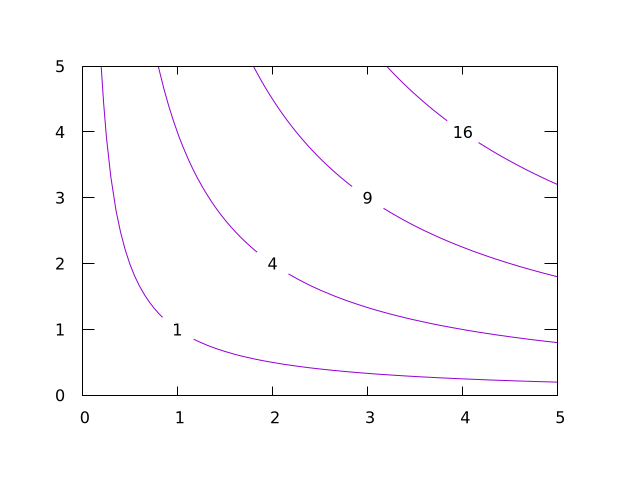

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::LABELED-CONTOUR-PLOT in DEFUN


In [128]:
(defun labeled-contour-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output
               :terminal '(pngcairo)
               :view :map
               :contour :base
               :xrange '(0 5)
               :yrange '(0 5)
               :style '( fill solid))
    (gp :set :for '|[n = 1:4]| :cntrparam :levels :discrete :n**2)
    (gp :set :for '|[n = 1:4]| :object :n :circle :at '(n n) :size 0.2 :front :fillcolor '(rgb "#ffffff") :lw 0)
    (gp :set :for '|[n = 1:4]| :label :n '|sprintf("%d", n**2)| :at '(n n) :center :front)
    (gp :unset :key)
    (gp :unset :surf)
    (gp :unset :clabel)
    (splot "x*y")
    )output)
(png-from-file (labeled-contour-plot "images/labeled-contour-plot.png"))


SOFTENED-AXIS-PLOT

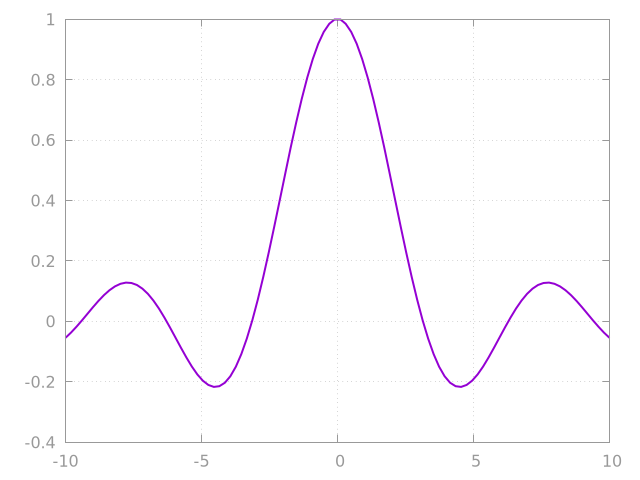

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::SOFTENED-AXIS-PLOT in DEFUN


In [129]:
(defun softened-axis-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo) :style
              '(line 2 lc rgb ("'#999999'") lt 0 ("#grid")) :style
              '(line 1 lc rgb ("'#999999'") lt 1 ("#border")) :grid
              '(linestyle 2) :border '(linestyle 1))
    (gp :unset :key)
    (gp :unset :surf)
    (gp :unset :clabel)
    (plot "sin(x)/x" :lw 2))
  output)
(png-from-file (softened-axis-plot "images/softened-axis-plot.png"))


ARROW-AXIS-PLOT

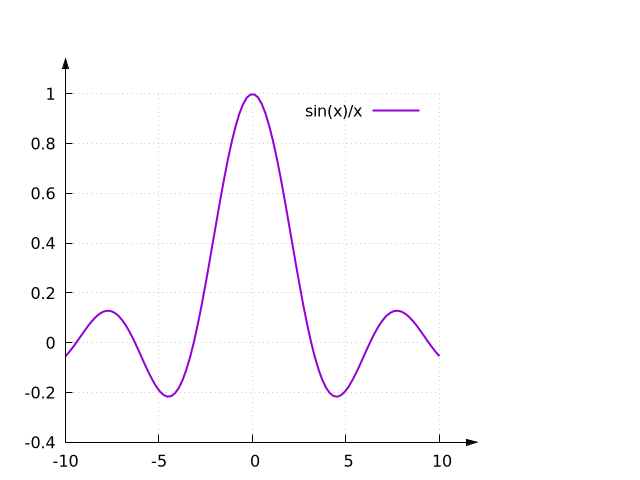

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::ARROW-AXIS-PLOT in DEFUN


In [130]:
(defun arrow-axis-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output :terminal '(pngcairo)
              :tmargin 5 :rmargin 20 :border 3 :tics 'nomirror :grid 'nil)
    (gp :set :arrow
             :from :graph '(0 1) :to :graph '(0 1.1) :filled)
    (gp :set :arrow
             :from :graph '(1 0) :to :graph '(1.1 0) :filled)
    (plot "sin(x)/x" :lw 2))
  output)
(png-from-file (arrow-axis-plot "images/arrow-axis-plot.png"))


PLOTTING-WITH-IMAGES-PLOT

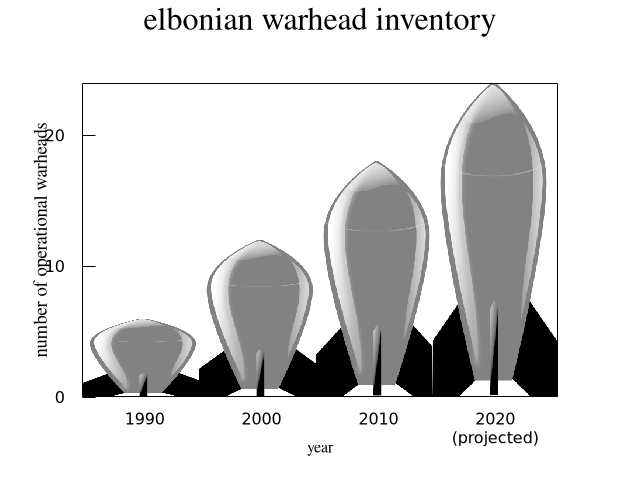

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::PLOTTING-WITH-IMAGES-PLOT in DEFUN



" set terminal pngcairo 
 set output \"images/plotting-with-images-plot.png\" 
 set title \"elbonian warhead inventory\" font \"times,24\" offset 0,2 
 set xlabel \"year\" font \"times,12\" 
 set ylabel \"number of operational warheads\" font \"times,14\" 
 set tics nomirror 
 set xtics scale 0 
 set for [n = 0 : 3] ytics (sprintf(\"%d\" , (n*10)) 200*n) 
 set for [n = 0 : 3] xtics (sprintf(\"%d\" , 1990+10*n) 91+200*n) 
 set xtics add (\"2020\\n(projected)\" 691) 
 set cbrange [0:250] 
 set pal gray positive 
 set view map 
 unset key 
 unset colorbox 
splot  for [n = 0 : 3] 'images/bomb.png' binary filetype=auto center=(91+200*n, 300*0.2*(1+n), 0) dy=0.2*(1+n) with image

set output" 

In [149]:
(defun plotting-with-images-plot (output)
  (with-plots (s :debug t)
    (gp-setup :output output :terminal '(pngcairo))
    (gp :set :title "elbonian warhead inventory" :font "times,24" :offset '(0 2))
    (gp :set :xlabel "year" :font "times,12")
    (gp :set :ylabel "number of operational warheads" :font "times,14")
    (gp :set :tics :nomirror)
    (gp :set :xtics :scale 0)
    (gp :set :for '|[n = 0 : 3]| :ytics '|(sprintf(\"%d\" , (n*10)) 200*n)|)
    (gp :set :for '|[n = 0 : 3]| :xtics '|(sprintf(\"%d\" , 1990+10*n) 91+200*n)|)
    (gp :set :xtics :add '|(\"2020\\n(projected)\" 691)|)
    (gp :set :cbrange '(0 250))
    (gp :set :pal '(gray positive))
    (gp :set :view 'map)
    (gp :unset :key)
    (gp :unset :colorbox)
    (splot
     " for [n = 0 : 3] 'images/bomb.png' binary filetype=auto center=(91+200*n, 300*0.2*(1+n), 0) dy=0.2*(1+n) with image"))
  output)
(png-from-file
 (plotting-with-images-plot "images/plotting-with-images-plot.png"))


BROKEN-AXIS-PLOT

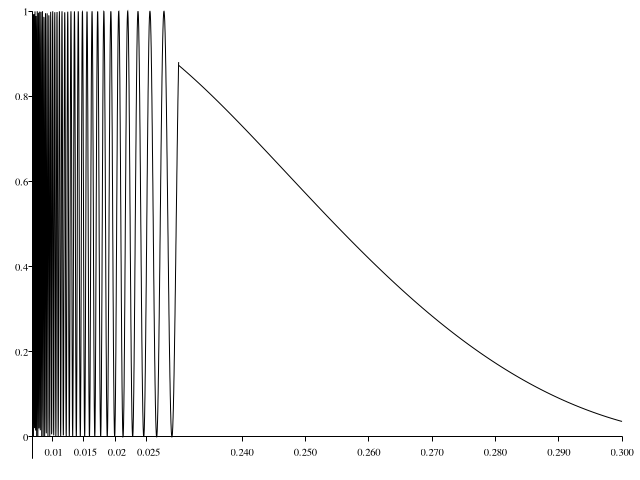

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::BROKEN-AXIS-PLOT in DEFUN


In [8]:
(defun broken-axis-plot (output)
  (with-plots (s :debug nil)
      (gp-setup :output output :terminal '(pngcairo font "times,8")
          :border 2
          :zeroaxis '(lt -1)
          :tics 'out :samp 5000
          :xrange '(0.007 .1)
          :yrange '(-.05 1)
          :xtics '(0.005 0.005 0.025) 
          ;; :object '("1 fillstyle pattern 5 lw 0") 
          :key '(font "times,12" samplen -1))
    (gp :set :xtics :axis :nomirror)
    (gp :set :ytics :axis :nomirror)
    (gp :unset :key)
    (gp :unset :surf)
    (gp :unset :clabel)
    (gp :s := 0.2)
    (gp :b := 0.03)
    (gp :w := 0.001)
    (gp :h := 1)
    (gp '|h(x)| := '|sin(1/x)**2|)
    (gp '|f(x)| := '|(x<b?h(x):NaN)|)
    (gp '|g(x)| := '|(x>b?h(x+s):NaN)|)
    (gp :set :for
        '|[n = 4 : 10]|
        :xtics :add '|(sprintf(\"%.3f\", s + n/100.0) n/100.0)|)

    ;;(gp :set :object '("1 polygon from first b-w,-h to b+w,-h to b+w,h to b-w,h to b-w,-h front"))
    (plot "f(x)" :title "sin(1/x)" :lt -1)
    (plot "g(x)" :notitle () :lt -1))

  output)
(png-from-file (broken-axis-plot "images/broken-axis-plot.png"))


FIT-GRID-TO-DATA-PLOT

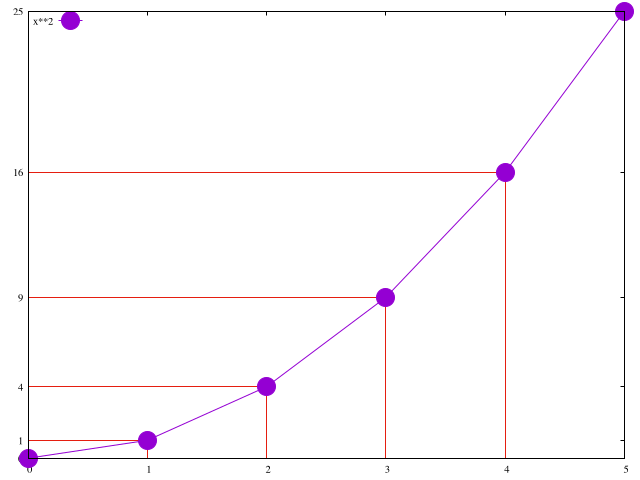

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::FIT-GRID-TO-DATA-PLOT in DEFUN


In [11]:
(defun fit-grid-to-data-plot (output)
  (with-plots (s :debug nil)
    (gp-setup :output output
              :terminal '(pngcairo font "times,8")
              :samples 6
              :key '(top left))
    (gp :set :for '|[n = 1 : 4]| :arrow :from :first '(n 0) :to :first '(n n**2) :back :nohead :lt 7)
    (gp :set :for '|[n = 1 : 4]| :arrow :from :first '(0 n**2) :to :first '(n n**2) :back :nohead :lt 7)
    (gp :set :for '|[n = 0 : 5]| :ytics '|(n**2)|)
    (plot "[0:5] x**2" :with :linespoints :pt 7 :ps 3))

  output)
(png-from-file (fit-grid-to-data-plot "images/fit-grid-to-data-plot.png"))


COLORING-AXIS-PLOT

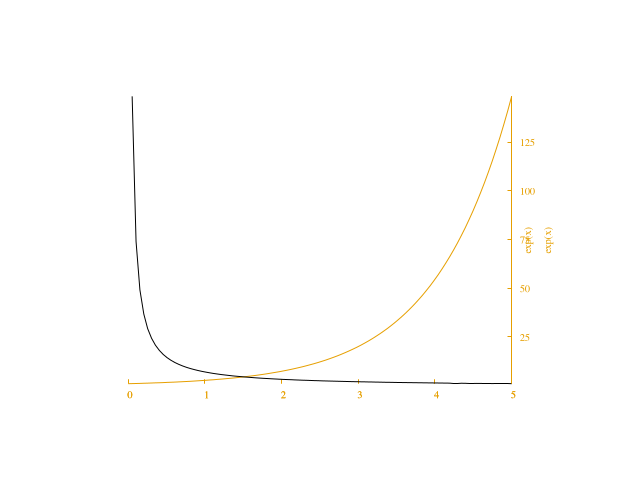

SB-INT:SIMPLE-STYLE-WARNING: The variable S is defined but never used.
SB-KERNEL:REDEFINITION-WITH-DEFUN: redefining COMMON-LISP-USER::COLORING-AXIS-PLOT in DEFUN



" set terminal pngcairo font \"times,8\" 
 set output \"images/coloring-axis-plot.png\" 
 set multiplot  
 set tmargin at screen 0.8 
 set rmargin at screen 0.8 
 set lmargin at screen 0.2 
 set bmargin at screen 0.2 
 set tics nomirror 
 set xrange [0:5] 
 set border 8 
 set border lt 4 
 set y2tics 0,25,150 
 set y2label \"exp(x)\" textcolor lt 4 
 unset key 
 unset ytics  
plot exp(x) axis x1y2 lt 4
plot 1/x lt -1
 set border 7 
 set border lt -1 
 set ylabel \"1/x\" textcolor lt -1 
 unset y2label 
 set ytics 0,1,5 
 set tics nomirror 
 unset y2tics  
 set yrange [0:5] 
 unset y2tics  
 unset multiplot 
set output" 

In [13]:
(defun coloring-axis-plot (output)
  (with-plots (s :debug t)
    (gp-setup :output output
              :terminal '(:pngcairo :font "times,8")
              :multiplot (list ""))
    
    (gp :set :tmargin '(at screen 0.8))
    (gp :set :rmargin '(at screen 0.8))
    (gp :set :lmargin '(at screen 0.2))
    (gp :set :bmargin '(at screen 0.2))
    (gp :set :tics :nomirror)
    (gp :set :xrange '(0 5))
    (gp :set :border 8)
    (gp :set :border '(lt 4))
    (gp :set :y2tics '(0 25 150))
    (gp :set :y2label "exp(x)" :textcolor :lt 4)
    (gp :unset :key)
    (gp :unset :ytics)
    (plot "exp(x)" :axis :x1y2 :lt 4)
    (gp :set :border 7)
    (gp :set :border :lt -1)
    (gp :set :ylabel "1/x" :textcolor :lt -1)
    (gp :unset :y2label)
    (gp :set :ytics '(0 1 5))
    (gp :set :tics 'nomirror)
    (gp :unset :y2tics)
    (gp :set :yrange '(0 5))
    (gp :unset :y2tics)
    (plot "1/x" :lt -1)
    (gp :unset :multiplot))
  output)
(png-from-file (coloring-axis-plot "images/coloring-axis-plot.png"))
